# **Music and Mental Health : Comprehensive Data Analysis and Machine Learning with Python**

## **Introduction:**

This analysis details the process and findings of a data analysis project aimed at exploring the relationship between music listening habits and their effects on mental health. The analysis involves data cleaning, exploratory data analysis, and the application of machine learning techniques to identify patterns and make predictions.

Dataset from Kaggle: https://www.kaggle.com/code/sabrinajeannin/music-and-mental-health/input

## 1. Data Loading

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.simplefilter('ignore')

# Set Pandas option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/sampledatasets/mxmh_survey_results.csv")

In [4]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

The dataset includes both categorical and numerical data, with missing values in many columns. There are a few missing items in the other columns, but the BPM column has the largest amount of missing values—107.(736-629)



**Summary:**
The dataset includes 736 entries and 33 columns, with both categorical and numerical data. Initial inspection revealed missing values in several columns.

## 2. Data Cleaning

In [5]:
# Calculate the sum of missing values in each column of the DataFrame 'df'
null_sums = df.isnull().sum()

# Calculate the percentage of missing values in each column relative to the total number of rows
null_sumsP = 100 * (null_sums / len(df))

# Combine the absolute and percentage counts of missing values into a single DataFrame
tot_sums = pd.concat([null_sums, null_sumsP], axis=1)

# Print the DataFrame showing both counts and percentages of missing values
print(tot_sums)


                                0          1
Timestamp                       0   0.000000
Age                             1   0.135870
Primary streaming service       1   0.135870
Hours per day                   0   0.000000
While working                   3   0.407609
Instrumentalist                 4   0.543478
Composer                        1   0.135870
Fav genre                       0   0.000000
Exploratory                     0   0.000000
Foreign languages               4   0.543478
BPM                           107  14.538043
Frequency [Classical]           0   0.000000
Frequency [Country]             0   0.000000
Frequency [EDM]                 0   0.000000
Frequency [Folk]                0   0.000000
Frequency [Gospel]              0   0.000000
Frequency [Hip hop]             0   0.000000
Frequency [Jazz]                0   0.000000
Frequency [K pop]               0   0.000000
Frequency [Latin]               0   0.000000
Frequency [Lofi]                0   0.000000
Frequency 

The above code is used to identify the missing data in each column of the DataFrame. Columns like "BPM" and "Music effects" have a higher percentages of missing values.

In [6]:
# Categorize 'Age' into groups and assign labels to these categories
df['AgeCategories'] = pd.cut(df['Age'], [0,16,29,59,90], labels=['Teen','Young','Middle','Elderly'])

# Categorize 'Hours per day' into groups and assign labels to these categories
df['HoursCategories'] = pd.cut(df['Hours per day'], [0,2,4,8,24], labels=['Minimal','Moderate','High','Extreme'])



Categorizing the data will help us simplify our analysis. We have categorized 'Age' into groups like 'Teen', 'Young', 'Middle', and 'Elderly'. This categorization helps in analyzing age-related patterns or behaviors.

'Hours per day' is categorized into groups like 'Minimal', 'Moderate', 'High', and 'Extreme', which helps us identify the frequency of certain activities related to the hours spent on them.

In [7]:
# Finding out / Validating Age Category numbers # Count occurrences of each unique value
df.value_counts('AgeCategories')

AgeCategories
Young      481
Middle     133
Teen        94
Elderly     27
Name: count, dtype: int64

In [8]:
# Finding out / Validating Age Category numbers ## Count occurrences of each unique value
df.value_counts('HoursCategories')

HoursCategories
Minimal     332
Moderate    209
High        146
Extreme      43
Name: count, dtype: int64

In [9]:
# Identify columns with only one unique value
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
one_value_cols

#goal of this code is to identify and compare columns that potentially carry no informational value
# or are constant across all rowsolumns with only one unique value (or none) usually do not
# contribute to model's predictive power

['Permissions']

In [10]:
# Drop the 'Permissions' column from the dataframe
df.drop("Permissions", axis=1, inplace=True)


The 'Permissions' column is dropped because it contains only one unique value, which does not help the further analysis making it non-informative.

In [11]:
# Count the number of NaN (Not a Number) values in the 'BPM' column of the dataframe 'df'
nan_count = df['BPM'].isnull().sum()

# Print the number of NaN values found in the 'BPM' column
print(f"Number of NaN values in 'BPM': {nan_count}")

# Replace values in the 'BPM' column where the value is either below 40 or above 300 with NaN
df.loc[(df['BPM'] < 40) | (df['BPM'] > 300), 'BPM'] = np.nan


Number of NaN values in 'BPM': 107


The code counts the number of NaN (missing) values in the 'BPM' column.
The output count given is of 107 NaN values in the 'BPM' column. It will now replaces values in the 'BPM' column that are below 40 or above 300 with NaN addressing the outliers.

In [12]:
# Validation code:
# Check for any values still out of the expected range
out_of_range_values = df[(df['BPM'] < 40) | (df['BPM'] > 300)]
print("Out of range values (should be empty):")
print(out_of_range_values)

# Count NaN values in the 'BPM' column
nan_count = df['BPM'].isnull().sum()
print(f"Number of NaN values in 'BPM': {nan_count}")


Out of range values (should be empty):
Empty DataFrame
Columns: [Timestamp, Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects, AgeCategories, HoursCategories]
Index: []
Number of NaN values in 'BPM': 115


After replacing values below 40 or above 300 with NaN in the 'BPM' column, we will check if there are any values still remaining outside this expected range. This will validate the success of the data cleaning process by confirming the absence of out-of-range values and provides information on the remaining missing values in the 'BPM' column.


In [13]:
df['BPM'] = df.groupby('Fav genre')['BPM'].transform(lambda x: x.fillna(x.mean())) # Replace null values in 'BPM' with
# mean per 'fav_genre' #transform function applied to the 'BPM' column within each group.
# This method is used for performing a group-wise operation.

In [14]:
# Count remaining NaN values in 'BPM'
remaining_nulls = df['BPM'].isnull().sum()
print(f"Remaining NaN values in 'BPM': {remaining_nulls}")

Remaining NaN values in 'BPM': 0


In [15]:
# Display the number of unique values for each object-type column
df.select_dtypes("object").nunique()    #Only Ojbects


Timestamp                       735
Primary streaming service         6
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Music effects                     3
dtype: int64

In [16]:
# Display descriptive statistics for object-type columns
df.describe(include="object").T


,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


This code helps us understand our categorical data better. It tells us how many unique values each category has, which value appears most often, and how frequently it appears. This information is useful for understanding the diversity and distribution of our categorical features.

In [17]:
# Drop the 'Timestamp' column from the dataframe
df.drop("Timestamp", axis=1, inplace=True)

In [18]:
#Checks to prove no major difference after fillna
print("Null BPMs after cleanup: ", df.isnull().sum())

Null BPMs after cleanup:  Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia              

In [19]:
# Fill missing values in the 'Age' column with the column's mean value
df["Age"].fillna(df["Age"].mean(), inplace=True)

# Convert the 'Age' column data type from float to integer
df["Age"] = df["Age"].astype(int)

# Display information about the 'Age' column to check the new data type and completeness
df["Age"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Age
Non-Null Count  Dtype
--------------  -----
736 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [20]:
# Iterate over columns and print the name and count of NaN values for columns with NaNs
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(df[i].name, df[i].isna().sum())


Primary streaming service 1
While working 3
Instrumentalist 4
Composer 1
Foreign languages 4
Music effects 8
AgeCategories 1
HoursCategories 6


This will check each column in the DataFrame for missing values and prints the column name along with the count of missing values. The output tells us which columns have missing data and how many missing values each column has.

In [21]:
#drop all rows with na as there are hardly any left, very low na volumes left in data
df.dropna(inplace=True, axis=0)   #axis=1 should remove columns with nas
df.shape

(713, 33)

In [22]:
#Checks after dropna removed all rows with na
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(df[i].name, df[i].isna().sum())


The code helps us pinpoint which columns have missing data and how many missing values are present in each column.

Since the data has no missing values in any columns of the DataFrame, the condition df[i].isna().sum() > 0 will never be satisfied, so no output will be printed.


**Summary:**
Data cleaning included finding and fixing missing values, removing the 'Permissions' column that wasn't useful, and handling extreme 'BPM' values by replacing them with average values for each music genre. Missing 'Age' values were filled with the average and converted to whole numbers. New categories were made for 'Age' and 'Hours per day', and a 'total_issues' feature was created to sum up mental health conditions. These steps prepared the dataset for analysis and machine learning.

## 3. Feature Engineering

In [23]:

# Calculate the absolute sum of issues related to Anxiety, Depression, Insomnia, and OCD, and store in a new column
df['total_issues'] = np.abs(df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD'])

# Calculate the percentage of total issues relative to a maximum possible value of 40, and store in another new column
df['total_%'] = np.abs((df['total_issues'] / 40) *100)

# Display the first 25 rows of the DataFrame to review the newly added columns
df.sample(25)


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,AgeCategories,HoursCategories,total_issues,total_%
361,17,Spotify,3.0,Yes,No,No,Metal,Yes,No,104.000000,Never,Rarely,Rarely,Never,Sometimes,Sometimes,Never,Never,Never,Never,Very frequently,Never,Rarely,Sometimes,Very frequently,Never,5.0,6.0,9.0,9.0,Improve,Young,Moderate,29.0,72.5
163,21,Spotify,3.0,Yes,Yes,Yes,Metal,Yes,No,150.000000,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Never,Sometimes,Very frequently,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,3.0,3.0,7.0,0.0,No effect,Young,Moderate,13.0,32.5
442,13,Spotify,6.0,Yes,No,No,Rap,Yes,No,112.000000,Never,Never,Never,Never,Never,Very frequently,Never,Rarely,Never,Rarely,Never,Rarely,Never,Very frequently,Never,Never,4.0,0.0,0.0,2.0,Worsen,Teen,High,6.0,15.0
300,33,Spotify,2.0,Yes,No,No,Metal,Yes,Yes,142.763158,Rarely,Rarely,Never,Rarely,Never,Sometimes,Never,Never,Never,Never,Very frequently,Never,Never,Sometimes,Sometimes,Sometimes,7.0,2.0,3.0,0.0,Improve,Middle,Minimal,12.0,30.0
269,20,YouTube Music,1.0,No,No,No,Pop,Yes,No,86.000000,Rarely,Never,Never,Rarely,Never,Never,Never,Never,Never,Rarely,Rarely,Very frequently,Never,Never,Sometimes,Never,3.0,5.0,3.0,0.0,Improve,Young,Minimal,11.0,27.5
142,27,Spotify,10.0,Yes,No,No,Metal,Yes,Yes,185.000000,Sometimes,Never,Sometimes,Never,Never,Sometimes,Rarely,Never,Never,Rarely,Very frequently,Very frequently,Rarely,Sometimes,Very frequently,Rarely,5.0,6.0,6.0,3.0,Improve,Young,Extreme,20.0,50.0
435,15,Spotify,6.0,Yes,Yes,No,K pop,Yes,Yes,110.000000,Sometimes,Never,Rarely,Sometimes,Never,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Rarely,Very frequently,Sometimes,Rarely,Very frequently,Never,8.0,8.0,7.0,10.0,No effect,Teen,High,33.0,82.5
292,16,Spotify,2.5,No,Yes,Yes,Metal,Yes,No,110.000000,Never,Never,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Very frequently,Never,Never,Rarely,Very frequently,Sometimes,5.0,3.0,3.0,1.0,Improve,Teen,Moderate,12.0,30.0
552,18,YouTube Music,3.0,Yes,No,No,Pop,No,No,150.000000,Rarely,Rarely,Sometimes,Rarely,Never,Very frequently,Rarely,Rarely,Never,Rarely,Rarely,Very frequently,Rarely,Very frequently,Rarely,Sometimes,5.0,4.0,2.0,0.0,No effect,Young,Moderate,11.0,27.5
452,23,Spotify,2.0,Yes,No,No,Pop,No,No,75.000000,Sometimes,Rarely,Rarely,Sometimes,Never,Very frequently,Sometimes,Never,Never,Never,Never,Very frequently,Very frequently,Very frequently,Sometimes,Sometimes,7.0,6.0,4.0,3.0,Improve,Young,Minimal,20.0,50.0


In [24]:
df.to_excel("/content/drive/MyDrive/sampledatasets/mxmh_CLEANED.xlsx")
#Creating an external back up of the clean data


**Summary:**
New features 'total_issues' and 'total_%' are created to quantify the cumulative impact of various mental health conditions.


## 4. Descriptive Statistics and Exploratory Data Analysis

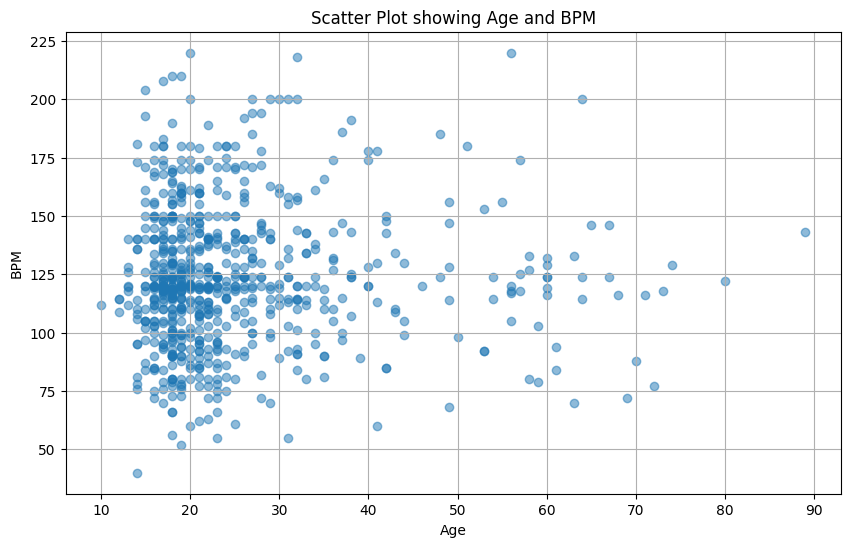

In [25]:
#create and display a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['BPM'], alpha=0.5)
plt.title('Scatter Plot showing Age and BPM')
plt.xlabel('Age')
plt.ylabel('BPM')
plt.grid(True)
plt.show()


**Scatter Plot Analysis: Age and BPM**
The scatter plot shows the relationship between Age and BPM (Beats Per Minute). Most participants are between 10 and 30 years old, with their BPM values ranging from 50 to 200, clustering around 100 to 150 BPM. For participants older than 30, BPM values are more spread out and fewer in number. There is no clear trend or pattern indicating a direct relationship between age and BPM. This suggests that BPM varies widely among individuals regardless of their age.

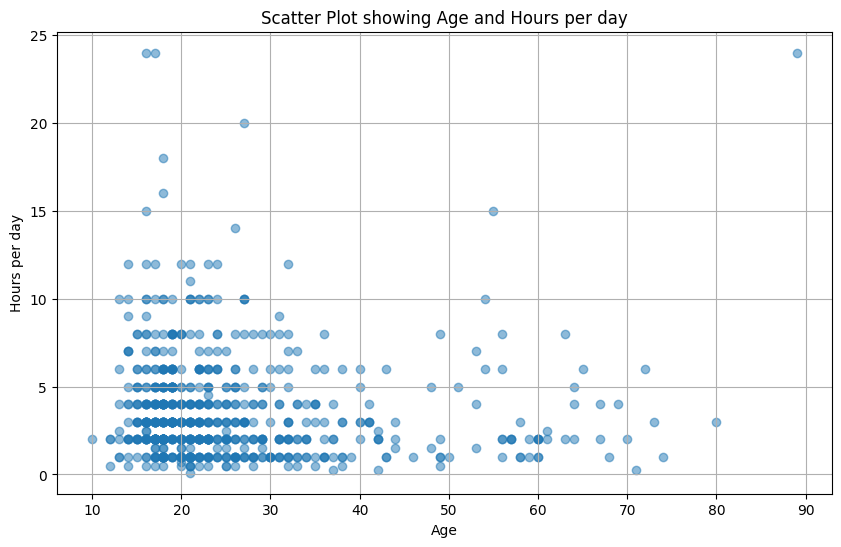

In [26]:
#create and display a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Hours per day'], alpha=0.5)
plt.title('Scatter Plot showing Age and Hours per day')
plt.xlabel('Age')
plt.ylabel('Hours per day')
plt.grid(True)
plt.show()


**Scatter Plot Analysis: Age and Hours per Day**
The scatter plot shows the relationship between Age and Hours per Day spent listening to music.
Younger individuals (10-30 years) tend to spend more time listening to music, with most listening between 0 to 5 hours per day and a few reporting over 10 hours.
Older individuals generally listen to music for fewer hours, mostly within the 0 to 5-hour range.
Some outliers exist with very high listening times, but no strong trend is seen linking age directly to listening hours.

### Box Plots to show Distributions

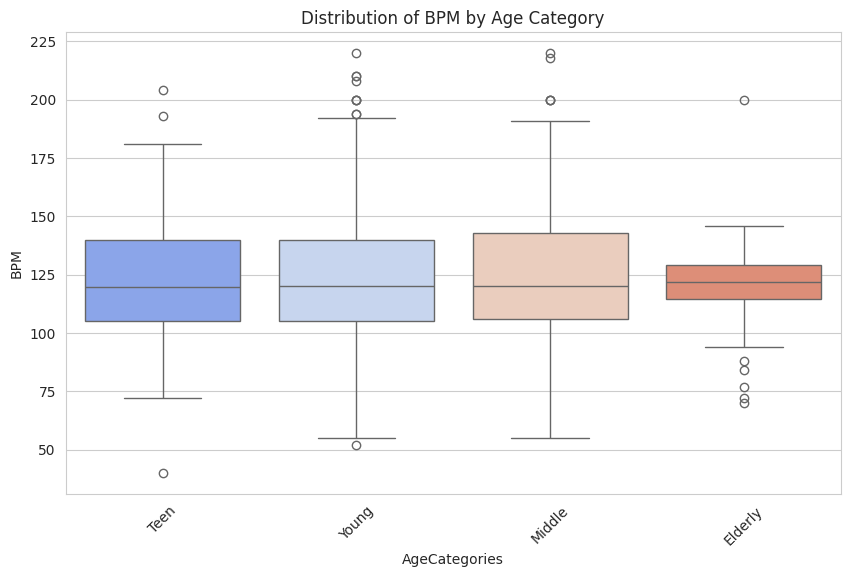

In [27]:
#create a boxplot using seaborn library to visualize the distribution of 'BPM' (beats per minute) across different age categories

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeCategories', y='BPM', data=df, palette='coolwarm')
plt.title('Distribution of BPM by Age Category')
plt.xticks(rotation=45)
plt.show()

**Box Plot Analysis: BPM by Age Category**
The box plot shows the distribution of BPM (Beats Per Minute) across different age categories: Teen, Young, Middle, and Elderly.
BPM is generally consistent across age groups, with younger and elderly individuals showing less variation and fewer outliers compared to middle-aged individuals.

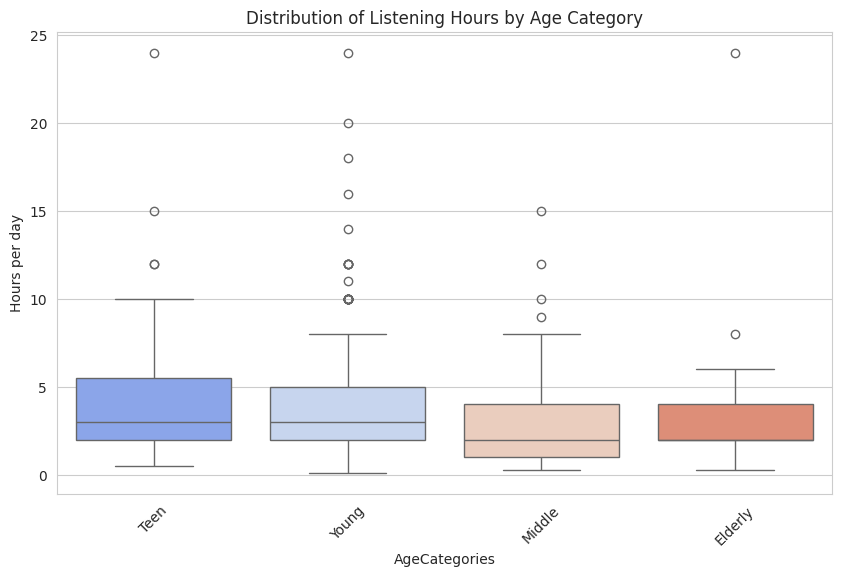

In [28]:
# Ensure the aesthetic style of the plots is set
sns.set_style("whitegrid")
# Box Plot: Distribution of listening hours within each age category
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeCategories', y='Hours per day', data=df, palette='coolwarm')
plt.title('Distribution of Listening Hours by Age Category')
plt.xticks(rotation=45)
plt.show()

**Box Plot Analysis: Listening Hours by Age Category**
Younger individuals (Teens and Young) tend to listen to music more frequently and for longer durations compared to middle-aged and elderly individuals. Outliers indicate some individuals in all age groups listen for exceptionally long periods.

### Bar Plots to Understand Individual Mental Illnesses

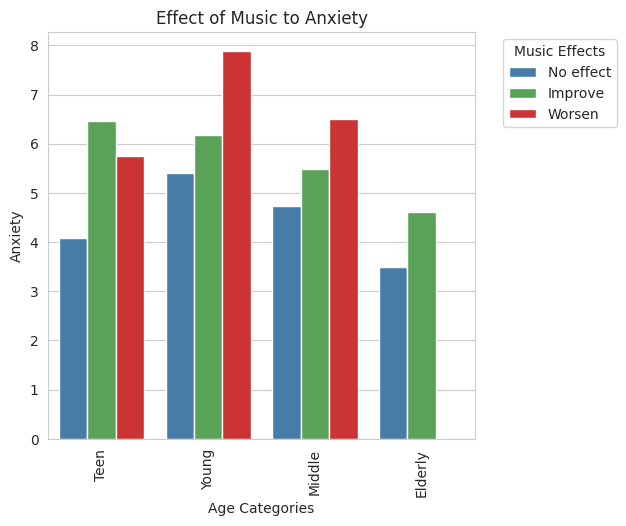

In [29]:
#creates a bar plot to visualize the effect of music on anxiety across different age categories.

custom_colors = ['#377EB8','#4DAF4A', '#E41A1C']  # Example: Blue=#377EB8, Green=#4DAF4A, Red=#E41A1C
#plt.figure(figsize=(7, 3))
sns.barplot(x='AgeCategories',y='Anxiety', hue='Music effects', data=df, errorbar=None, palette=custom_colors)
# Create the legend directly from the plot
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Effect of Music to Anxiety')
plt.xlabel('Age Categories')
plt.ylabel('Anxiety')
plt.xticks(rotation=90)
plt.show()

**Bar Plot Analysis: Effect of Music on Anxiety by Age Category**
The bar plot shows the effect of music on anxiety levels across different age categories: Teen, Young, Middle, and Elderly, with three possible effects: No effect, Improve, and Worsen.
Music generally has a positive impact on anxiety across all age groups, particularly in the elderly and teens. However, a significant portion of young and middle-aged individuals report worsened anxiety due to music.

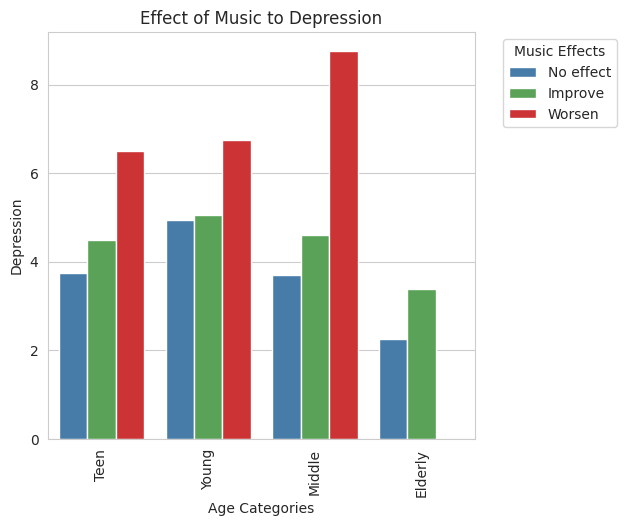

In [30]:
#bar plot illustrating the impact of music on depression across various age categories

custom_colors = ['#377EB8','#4DAF4A', '#E41A1C']  # Example: Blue=#377EB8, Green=#4DAF4A, Red=#E41A1C
#plt.figure(figsize=(7, 3))
sns.barplot(x='AgeCategories',y='Depression', hue='Music effects', data=df, errorbar=None, palette=custom_colors)
# Create the legend directly from the plot
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Effect of Music to Depression')
plt.xlabel('Age Categories')
plt.ylabel('Depression')
plt.xticks(rotation=90)
plt.show()

**Bar Plot Analysis: Effect of Music on Depression by Age Category**

The plot indicates that while music helps improve depression in the elderly, it tends to worsen depression in middle-aged individuals. Teens and young adults have mixed responses, with a notable number experiencing both improvement and worsening effects.

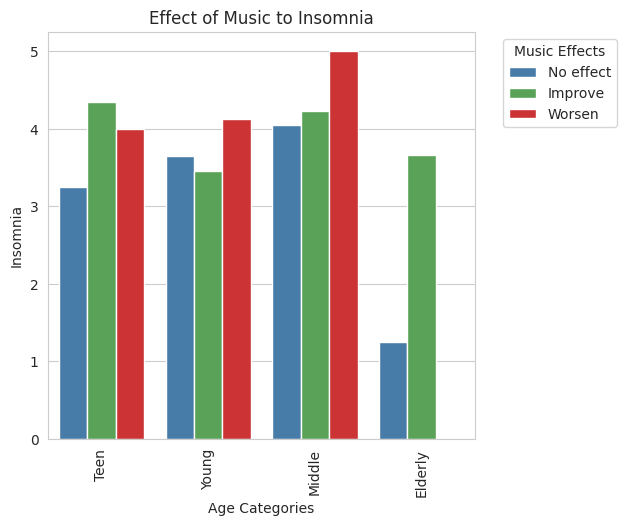

In [31]:
#bar plot illustrating the effect of music on insomnia across different age categories
custom_colors = ['#377EB8','#4DAF4A', '#E41A1C']  # Example: Blue=#377EB8, Green=#4DAF4A, Red=#E41A1C
#plt.figure(figsize=(7, 3))
sns.barplot(x='AgeCategories',y='Insomnia', hue='Music effects', data=df, errorbar=None, palette=custom_colors)
# Create the legend directly from the plot
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Effect of Music to Insomnia')
plt.xlabel('Age Categories')
plt.ylabel('Insomnia')
plt.xticks(rotation=90)
plt.show()

**Bar Plot Analysis: Effect of Music on Insomnia by Age Category**

Music tends to help with insomnia in teens and the elderly, while middle-aged individuals experience a notable increase in insomnia due to music. Young adults show mixed effects, with similar numbers reporting both improvement and worsening of insomnia.

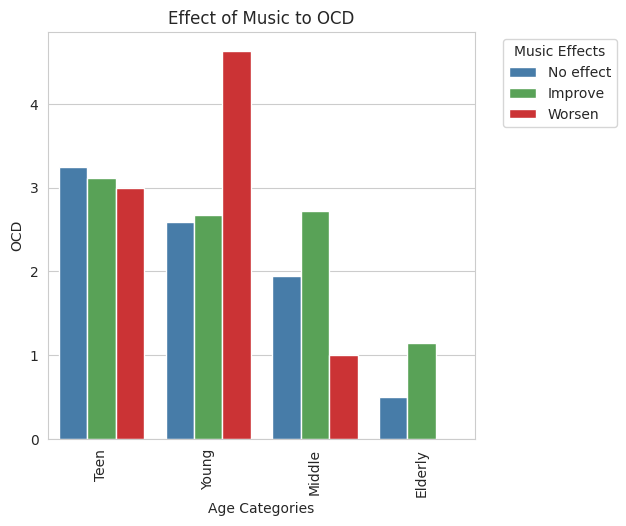

In [32]:
#construct a bar plot illustrating the effect of music on OCD (Obsessive-Compulsive Disorder) across various age categories.
custom_colors = ['#377EB8','#4DAF4A', '#E41A1C']  # Example: Blue=#377EB8, Green=#4DAF4A, Red=#E41A1C
#plt.figure(figsize=(7, 3))
sns.barplot(x='AgeCategories',y='OCD', hue='Music effects', data=df, errorbar=None, palette=custom_colors)
# Create the legend directly from the plot
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Effect of Music to OCD')
plt.xlabel('Age Categories')
plt.ylabel('OCD')
plt.xticks(rotation=90)
plt.show()

**Bar Plot Analysis: Effect of Music on OCD by Age Category**

Music tends to worsen OCD in young individuals, while it generally improves OCD in middle-aged and elderly individuals. Teens experience mixed effects, with a similar distribution across no effect, improvement, and worsening.

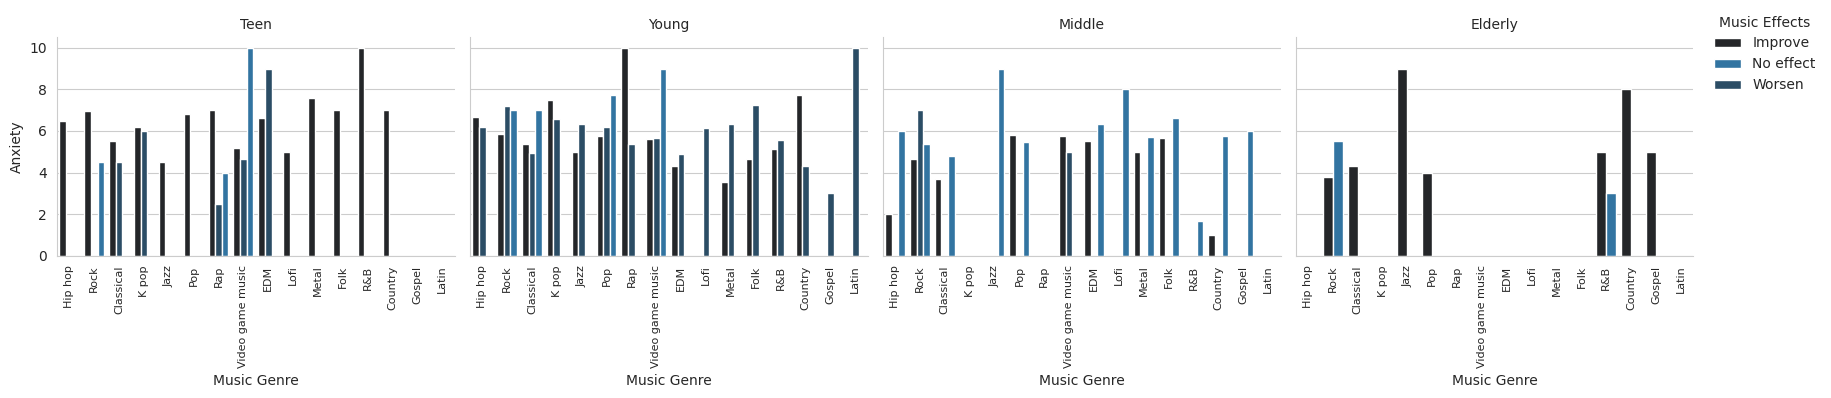

In [33]:
#displays multiple bar plots, each representing the relationship between anxiety levels and favorite music genre across different age categories
g = sns.FacetGrid(df, col='AgeCategories', height=4)
g.map_dataframe(sns.barplot, x='Fav genre', y='Anxiety', hue='Music effects', errorbar=None)
g.add_legend(title='Music Effects', loc='upper right',bbox_to_anchor=(1.07, 1))  # Legend within the graph
g.set_axis_labels('Music Genre', 'Anxiety')
g.set_xticklabels(rotation=90, fontsize =8)
g.set_titles(col_template="{col_name}")  # Title for each subplot
plt.tight_layout()
plt.show()


**Bar Plot Analysis: Effect of Music Genre on Anxiety by Age Category**

Music genres influence anxiety differently across age groups, with some genres like Hip Hop and Rock frequently improving anxiety, while others like Classical and Video Game Music have mixed or neutral effects.

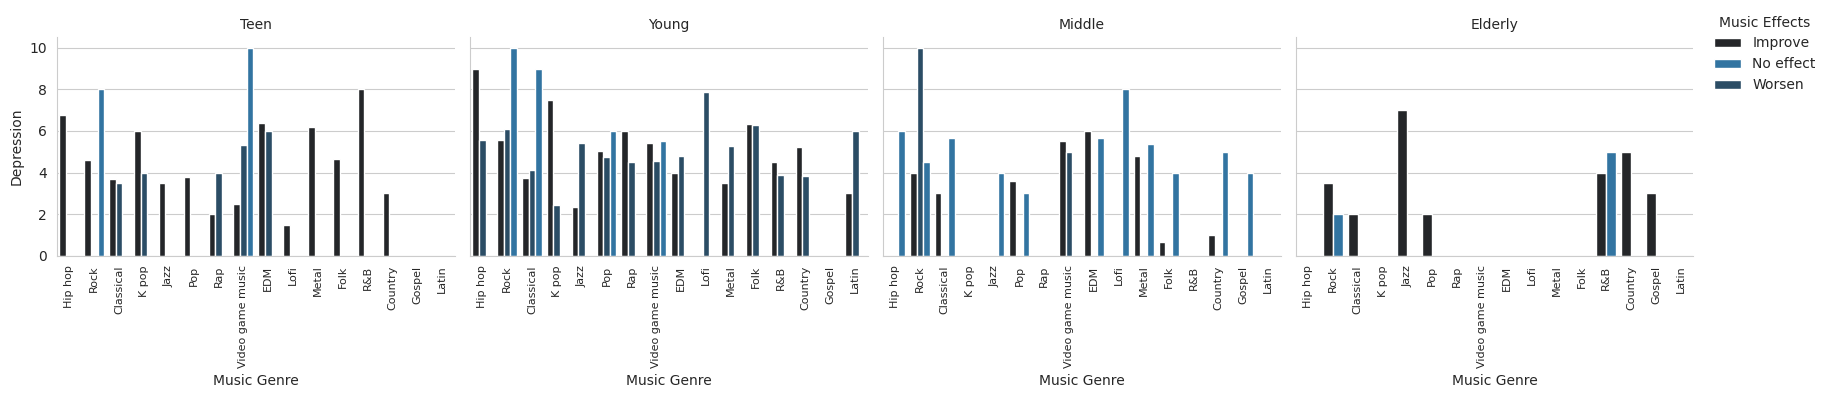

In [34]:
#display multiple bar plots, each representing the relationship between depression levels and favorite music genre across different age categories.
g = sns.FacetGrid(df, col='AgeCategories', height=4)
g.map_dataframe(sns.barplot, x='Fav genre', y='Depression', hue='Music effects', errorbar=None)
g.add_legend(title='Music Effects', loc='upper right',bbox_to_anchor=(1.07, 1))  # Legend within the graph
g.set_axis_labels('Music Genre', 'Depression')
g.set_xticklabels(rotation=90, fontsize =8)
g.set_titles(col_template="{col_name}")  # Title for each subplot
plt.tight_layout()
plt.show()

**Bar Plot Analysis: Effect of Music Genre on Depression by Age Category**

The bar plot shows that for teens and young adults, genres like Rap and Classical tend to worsen depression, while Hip Hop, Rock, and Pop often improve it; for middle-aged individuals, EDM and Rock typically improve depression, while Classical often worsens it; for the elderly, Gospel and Jazz show mixed effects, with Rock and Country generally improving depression.


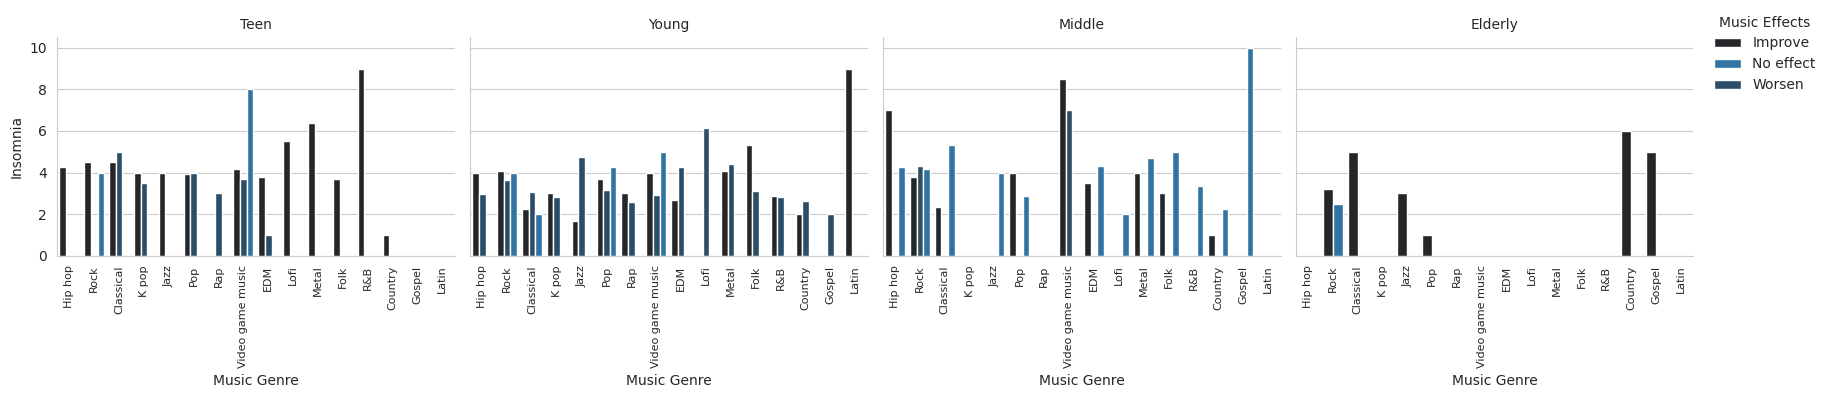

In [35]:
#display multiple bar plots, each representing the relationship between insomnia levels and favorite music genre across different age categories.
g = sns.FacetGrid(df, col='AgeCategories', height=4)
g.map_dataframe(sns.barplot, x='Fav genre', y='Insomnia', hue='Music effects', errorbar=None)
g.add_legend(title='Music Effects', loc='upper right',bbox_to_anchor=(1.07, 1))  # Legend within the graph
g.set_axis_labels('Music Genre', 'Insomnia')
g.set_xticklabels(rotation=90, fontsize =8)
g.set_titles(col_template="{col_name}")  # Title for each subplot
plt.tight_layout()
plt.show()

**Bar Plot Analysis: Effect of Music Genre on Insomnia by Age Category**

The bar plot shows that for teens, music genres like Rap, Rock, and Pop often improve insomnia, while Classical and Video Game Music have mixed effects; for young adults, Hip Hop, EDM, and Lofi typically improve insomnia, but Classical music often worsens it; for middle-aged individuals, EDM, Lofi, and Gospel tend to improve insomnia, while Classical and Rock show mixed effects; for the elderly, Country and Gospel generally improve insomnia, while Classical music often worsens it.

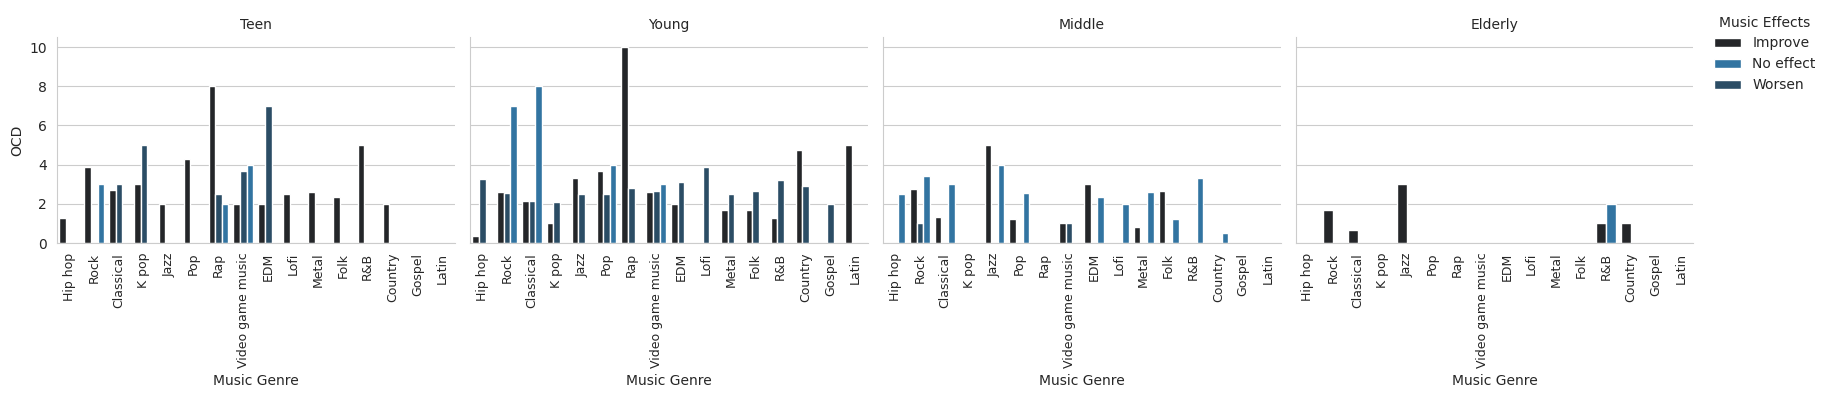

In [36]:
#display multiple bar plots, each representing the relationship between OCD (Obsessive-Compulsive Disorder) levels and favorite music genre across different age categories
g = sns.FacetGrid(df, col='AgeCategories', height=4)
g.map_dataframe(sns.barplot, x='Fav genre', y='OCD', hue='Music effects', errorbar=None)
g.add_legend(title='Music Effects', loc='upper right',bbox_to_anchor=(1.07, 1))  # Legend within the graph
g.set_axis_labels('Music Genre', 'OCD')
g.set_xticklabels(rotation=90, fontsize =9)
g.set_titles(col_template="{col_name}")  # Title for each subplot
plt.tight_layout()
plt.show()

**Bar Plot Analysis: Effect of Music Genre on OCD by Age Category**

The bar plot shows that for teens, genres like Pop, EDM, and Rap often improve OCD, while Video Game Music tends to worsen it; for young adults, EDM, Lofi, and Pop typically improve OCD, but Classical music often worsens it; for middle-aged individuals, genres like EDM and Lofi usually improve OCD, while Classical music has mixed effects; for the elderly, Rock and R&B generally improve OCD, with minimal reports of worsening effects.

###Visualizing Totals of Mental Illnesses (all 4 combined)

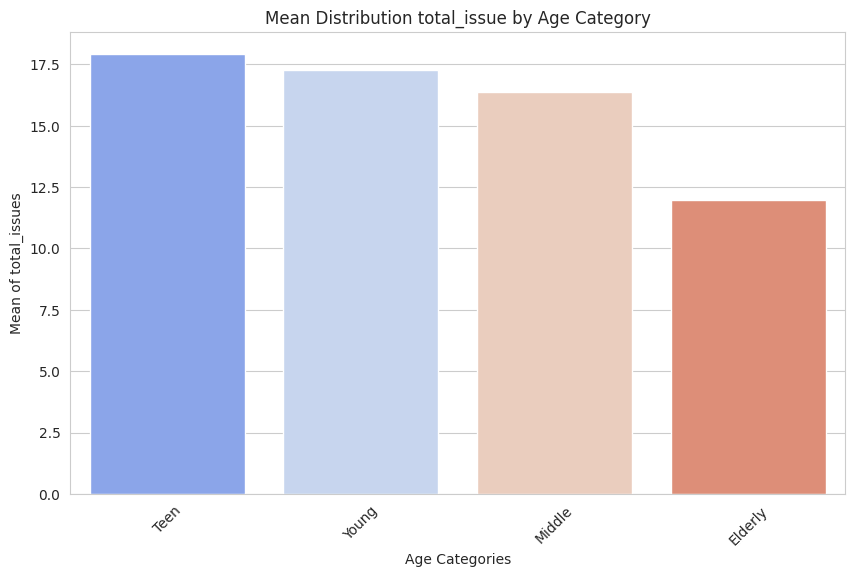

In [37]:
# Ensure the aesthetic style of the plots is set
sns.set_style("whitegrid")

# Bar Chart: Average total_issues  by AgeCategories
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeCategories', y='total_issues', data=df, ci=None, palette='coolwarm')
plt.title('Mean Distribution total_issue by Age Category')
plt.ylabel('Mean of total_issues')
plt.xlabel('Age Categories')
plt.xticks(rotation=45)
plt.show()

**Bar Plot Analysis: Mean Distribution of Total Issues by Age Category**

Teens and young adults report the highest mean number of total mental health issues, with the elderly reporting the least. This suggests that younger age groups experience more mental health issues on average compared to older age groups.

Text(0, 0.5, 'Total Percentage of Mental Illness')

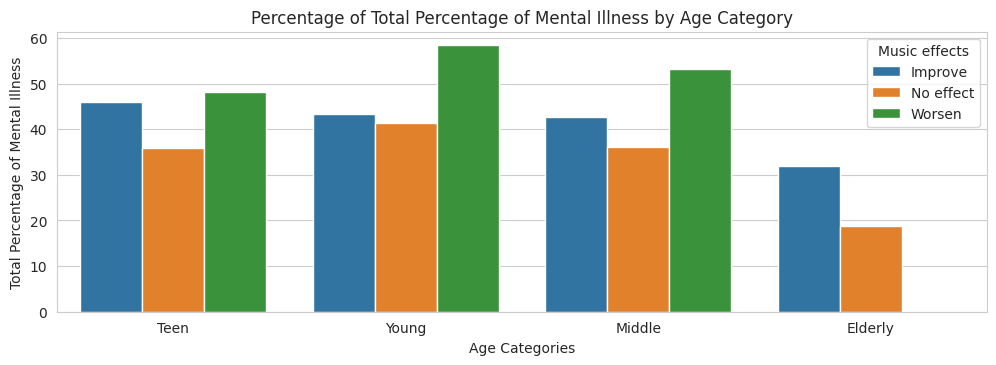

In [38]:
# Calculate the count of each 'Music effects' within each 'AgeCategories'
counts = pd.DataFrame(df.groupby(['AgeCategories', 'Music effects'])[['total_%','total_issues']].mean())

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(data=counts, x='AgeCategories', y='total_%', hue='Music effects')
plt.title('Percentage of Total Percentage of Mental Illness by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Total Percentage of Mental Illness')



**Bar Plot Analysis: Percentage of Total Mental Illness by Age Category and Music Effect- Mean**

The bar plot shows the percentage of total mental illness across different age categories: Teen, Young, Middle, and Elderly, categorized by the effect of music: Improve, No effect, and Worsen.

Music tends to worsen mental illness more frequently in teens, young adults, and middle-aged individuals, while it has a more positive effect on the elderly, with a higher percentage reporting improvements in mental health.

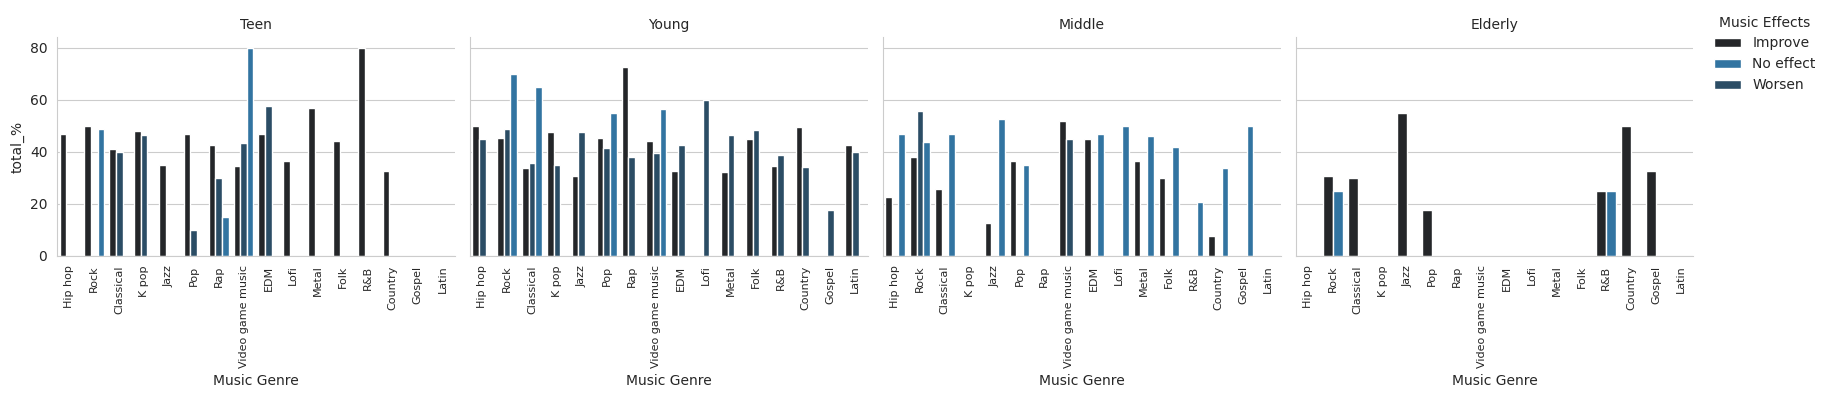

In [39]:
#display multiple bar plots, each representing the relationship between the total percentage and favorite music genre across different age categories.
g = sns.FacetGrid(df, col='AgeCategories', height=4)
g.map_dataframe(sns.barplot, x='Fav genre', y='total_%', hue='Music effects', errorbar=None)
g.add_legend(title='Music Effects', loc='upper right',bbox_to_anchor=(1.07, 1))  # Legend within the graph
g.set_axis_labels('Music Genre', 'total_%')
g.set_xticklabels(rotation=90, fontsize =8)
g.set_titles(col_template="{col_name}")  # Title for each subplot
plt.tight_layout()
plt.show()

**Bar Plot Analysis: Total Percentage of Mental Illness by Music Genre and Age Category**

The bar plot displays the total percentage of mental illness across different music genres and age categories (Teen, Young, Middle, Elderly) with the effects of music: Improve (black bars), No effect (blue bars), and Worsen (grey bars).

The effect of music on mental health varies by genre and age group. Generally, genres like Hip Hop, EDM, and Lofi are beneficial, while Classical music has mixed or adverse effects, particularly in younger and middle-aged individuals.

### Exploring Data by Listening Hours


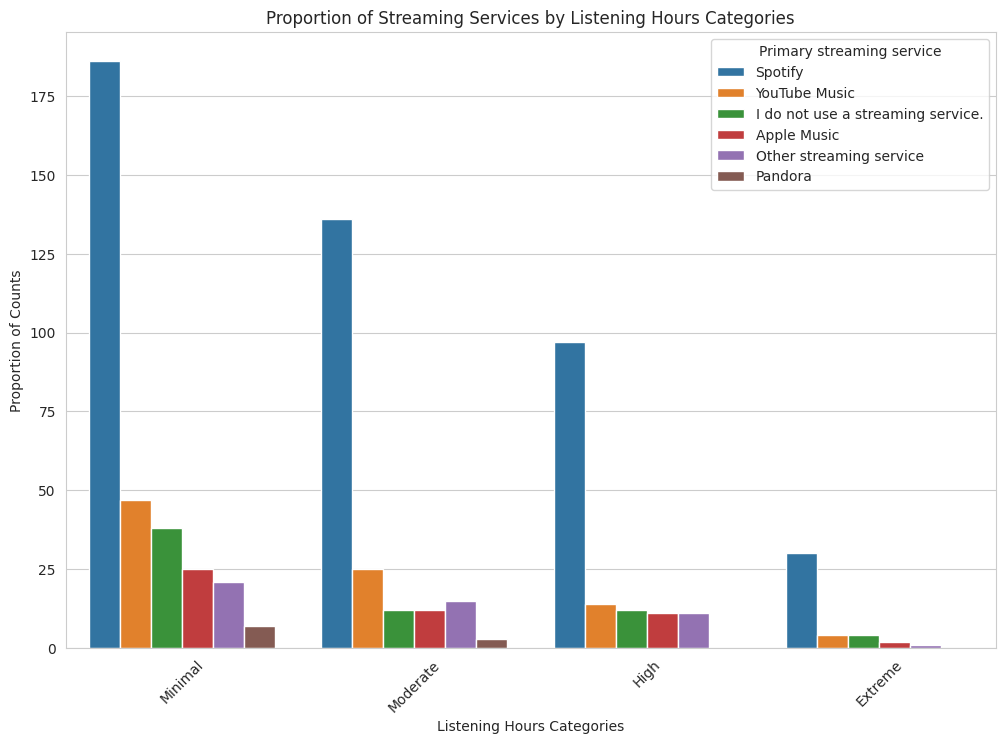

In [40]:
# To visualize the proportion of different streaming services used across different listening hours categories.
plt.figure(figsize=(12, 8))
sns.countplot(x='HoursCategories', hue='Primary streaming service', data=df, palette='tab10') #note the hue
plt.title('Proportion of Streaming Services by Listening Hours Categories')
plt.ylabel('Proportion of Counts')
plt.xlabel('Listening Hours Categories')
plt.xticks(rotation=45)
plt.show()

**Bar Plot Analysis: Proportion of Streaming Services by Listening Hours Categories**

The bar plot illustrates the proportion of different streaming services used across various listening hours categories: Minimal, Moderate, High, and Extreme.

Spotify is the most popular streaming service across all listening hours categories, especially among minimal and moderate listeners. Other streaming services like YouTube Music, Apple Music, and non-users have smaller proportions, with non-users more common among minimal listeners.

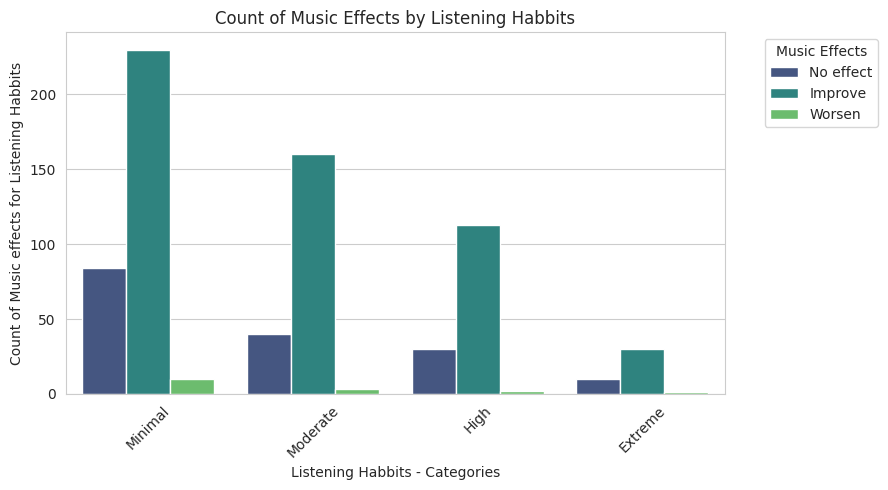

In [41]:
#to visualize the count of different music effects across various listening habits categories
plt.figure(figsize=(9, 5))
sns.countplot(x='HoursCategories', hue='Music effects', data=df, palette='viridis')
plt.title('Count of Music Effects by Listening Habbits')
plt.xticks(rotation=45)
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Listening Habbits - Categories')
plt.ylabel('Count of Music effects for Listening Habbits')
plt.tight_layout()
plt.show()

**Bar Plot Analysis: Count of Music Effects by Listening Habits**

Music generally improves conditions for individuals with minimal to moderate listening habits, while those with high to extreme listening habits report more cases of no effect and worsening.

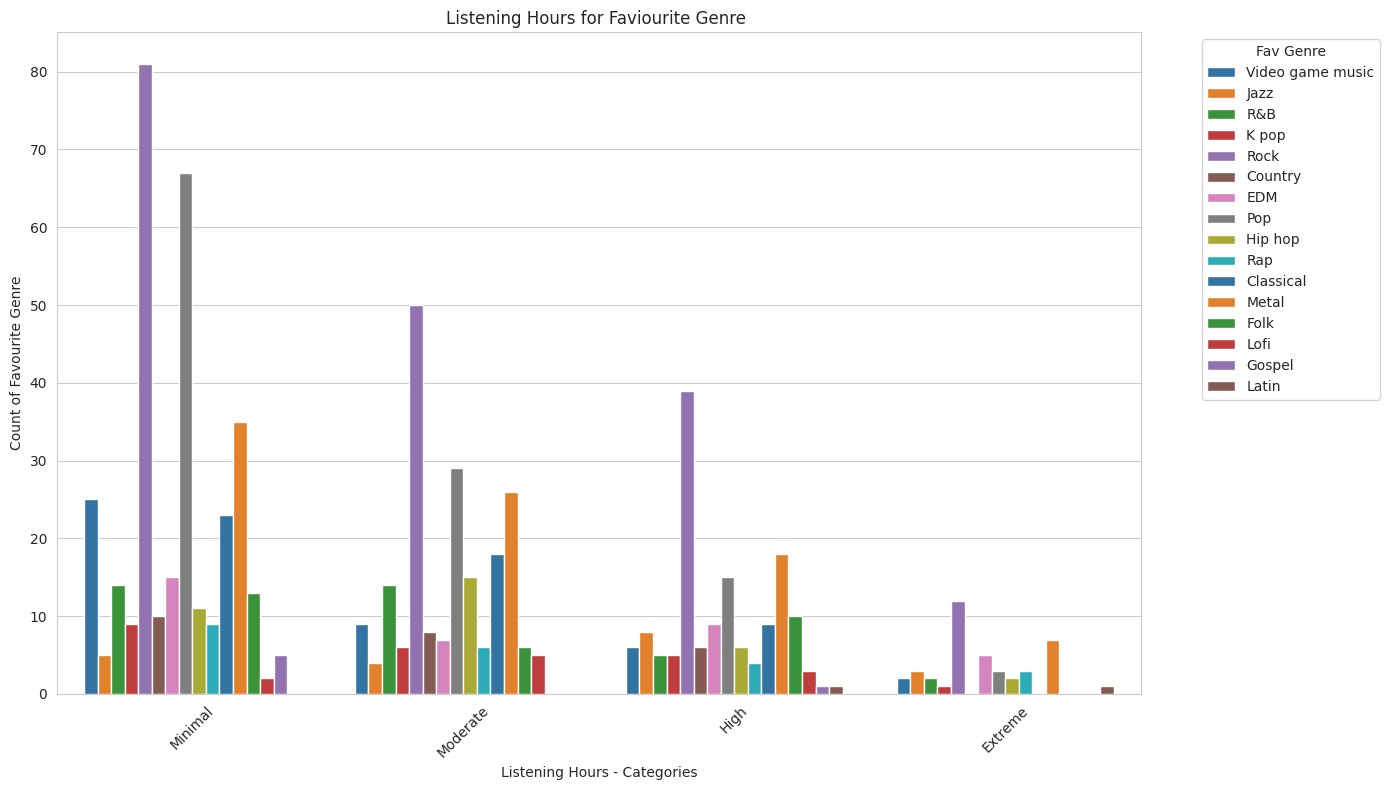

In [42]:
#to visualize the count of favorite genres across different listening hours categories
plt.figure(figsize=(14, 8))
sns.countplot(x='HoursCategories', hue='Fav genre', data=df, palette='tab10')
plt.title('Listening Hours for Faviourite Genre ')
plt.xticks(rotation=45)
plt.legend(title='Fav Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Listening Hours - Categories')
plt.ylabel('Count of Favourite Genre')
plt.tight_layout()
plt.show()

**Bar Plot Analysis: Listening Hours for Favorite Genre**

EDM and Rock are the most popular genres across all listening categories, especially in minimal and moderate listening. Pop and Country also have substantial followings, while other genres have more varied but lower counts.

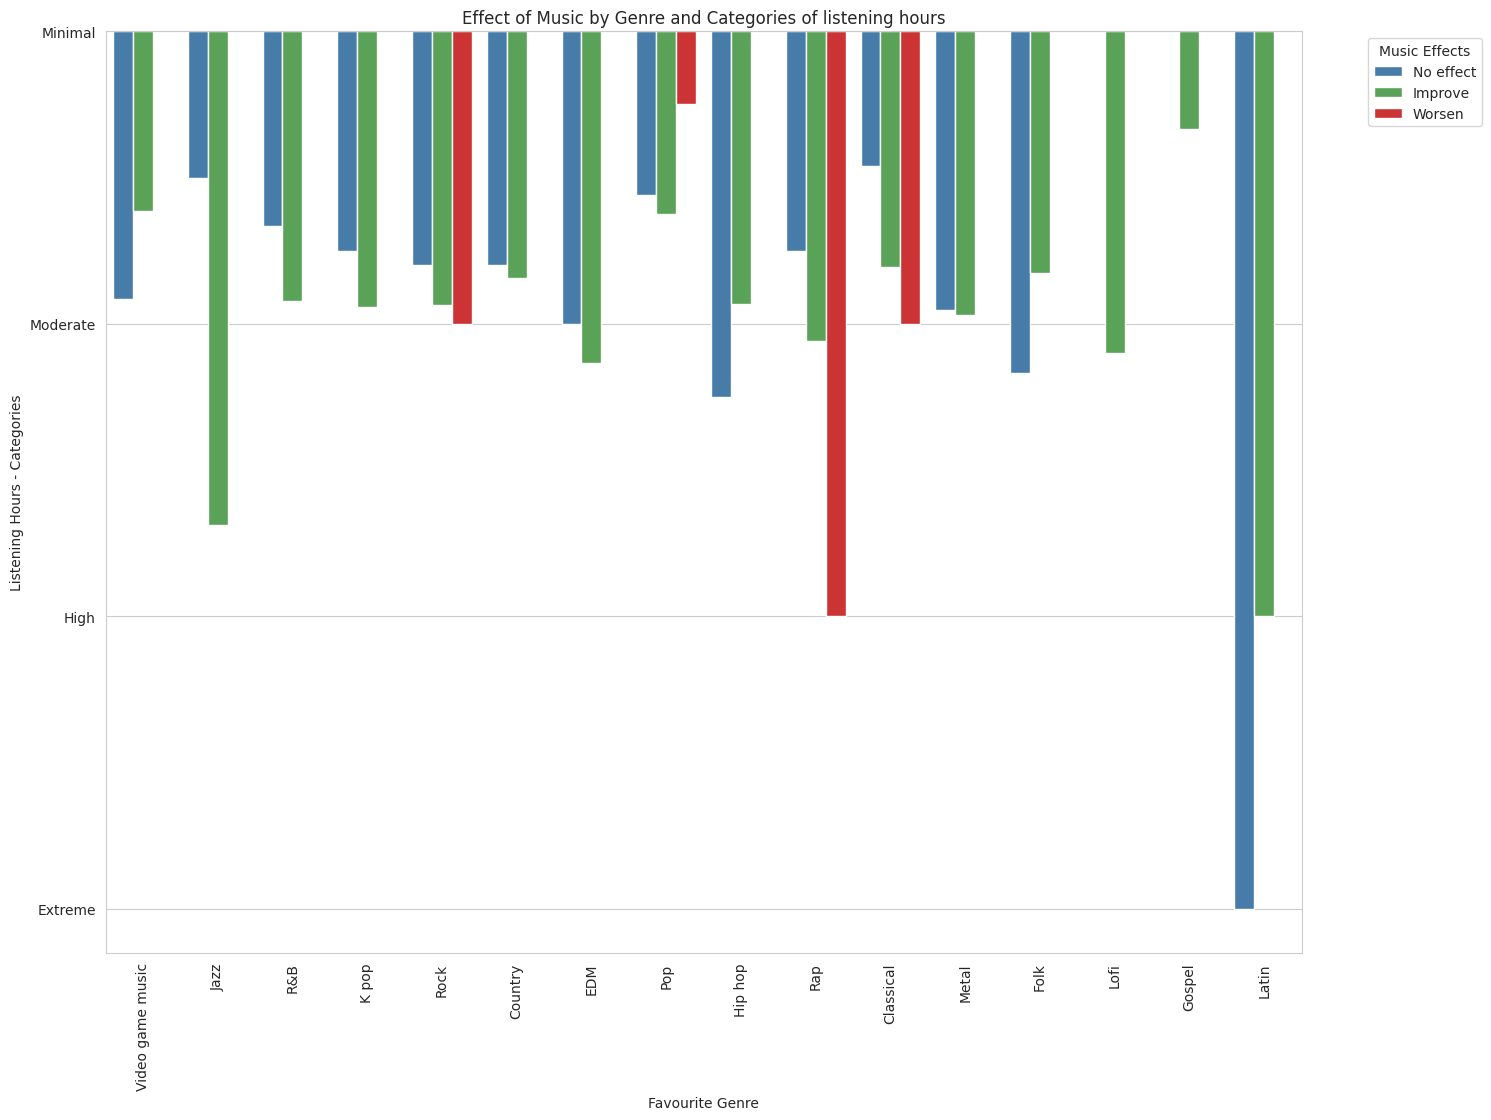

In [43]:
#to visualize the effect of music by genre across different categories of listening hours.
custom_colors = ['#377EB8','#4DAF4A', '#E41A1C']  # Example: Blue=#377EB8, Green=#4DAF4A, Red=#E41A1C
plt.figure(figsize=(15, 10))
sns.barplot(x='Fav genre', y='HoursCategories', hue='Music effects', data=df, errorbar=None, palette=custom_colors)
# Create the legend directly from the plot
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Effect of Music by Genre and Categories of listening hours')
plt.xlabel('Favourite Genre')
plt.ylabel('Listening Hours - Categories')
plt.xticks(rotation=90)
plt.show()


**Bar Plot Analysis: Effect of Music by Genre and Listening Hours Categories**

The bar plot shows the effects of different music genres on listeners categorized by their listening hours (Minimal, Moderate, High, and Extreme), with the effects being No effect (blue), Improve (green), and Worsen (red).

Music generally has a positive impact across most genres, especially with minimal to moderate listening hours. As listening hours increase to high and extreme, the positive effects persist but with fewer data points, while negative impacts are less common.

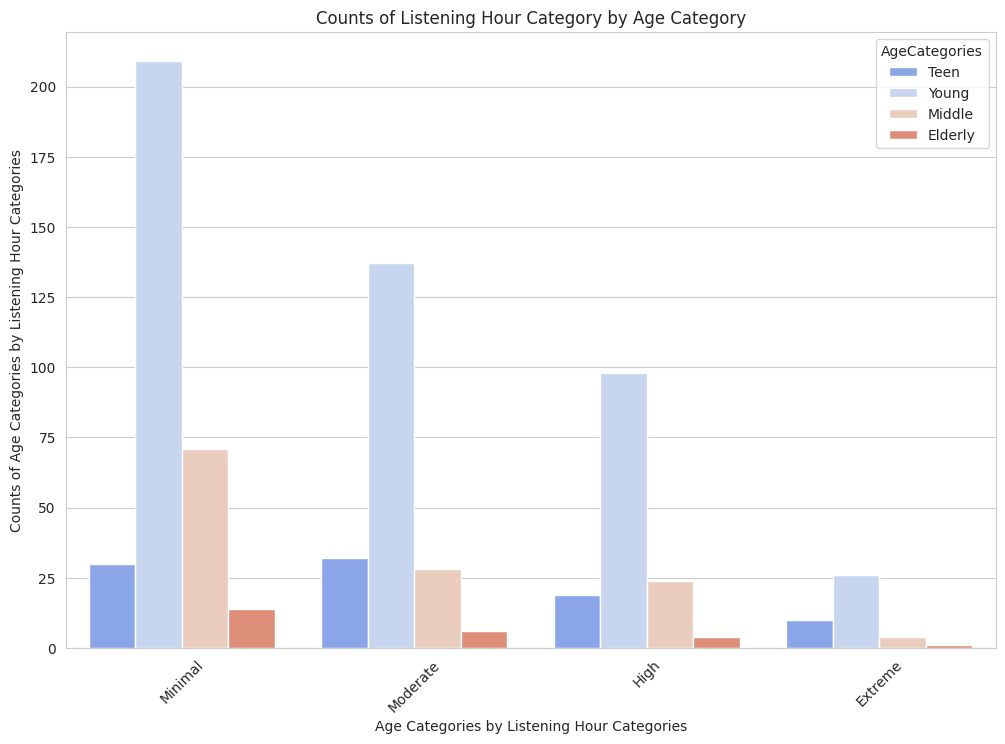

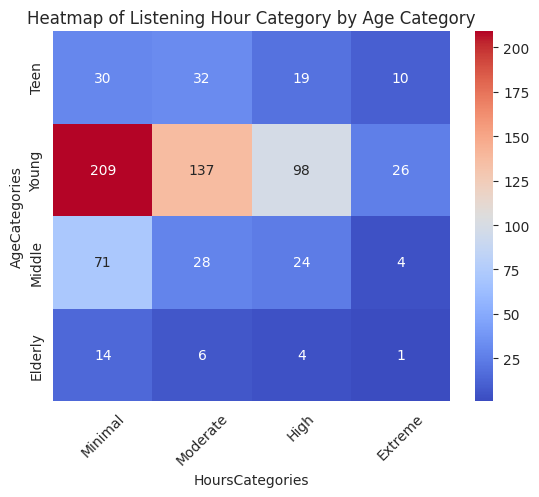

In [44]:
#Countplot and a heatmap
# both representing the relationship between age categories and listening hour categories.

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax=sns.countplot(x='HoursCategories', hue='AgeCategories', data=df, palette='coolwarm') #note the hue
plt.xticks(rotation=45)
plt.ylabel('Counts of Age Categories by Listening Hour Categories')
plt.xlabel('Age Categories by Listening Hour Categories')
plt.title('Counts of Listening Hour Category by Age Category')
plt.show()

for container in ax.containers:
    ax.bar_label(container)
pivot_table = pd.crosstab(index=df['AgeCategories'], columns=df['HoursCategories'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Listening Hour Category by Age Category')
plt.xticks(rotation=45)
plt.show()


**Bar Plot Analysis: Counts of Listening Hour Category by Age Category**

The bar plot shows the distribution of different age categories (Teen, Young, Middle, Elderly) across various listening hour categories: Minimal, Moderate, High, and Extreme.

Teens and young adults are the most frequent listeners across all categories, particularly in minimal and moderate listening hours. Middle-aged and elderly individuals listen less frequently, with the elderly being the least represented in high and extreme listening categories.


**Heatmap Analysis: Listening Hour Category by Age Category**

The heatmap displays the distribution of different age categories (Teen, Young, Middle, Elderly) across various listening hour categories (Minimal, Moderate, High, Extreme), with color intensity representing the count.

Young adults are the most frequent listeners across all categories, particularly in minimal and moderate listening hours. Teens are fairly distributed across categories, while middle-aged and elderly individuals predominantly have minimal listening hours, with the elderly being the least represented overall.

   HoursCategories Music effects  counts  total_counts  proportion
0          Minimal       Improve     230           324    0.709877
1          Minimal     No effect      84           324    0.259259
2          Minimal        Worsen      10           324    0.030864
3         Moderate       Improve     160           203    0.788177
4         Moderate     No effect      40           203    0.197044
5         Moderate        Worsen       3           203    0.014778
6             High       Improve     113           145    0.779310
7             High     No effect      30           145    0.206897
8             High        Worsen       2           145    0.013793
9          Extreme       Improve      30            41    0.731707
10         Extreme     No effect      10            41    0.243902
11         Extreme        Worsen       1            41    0.024390


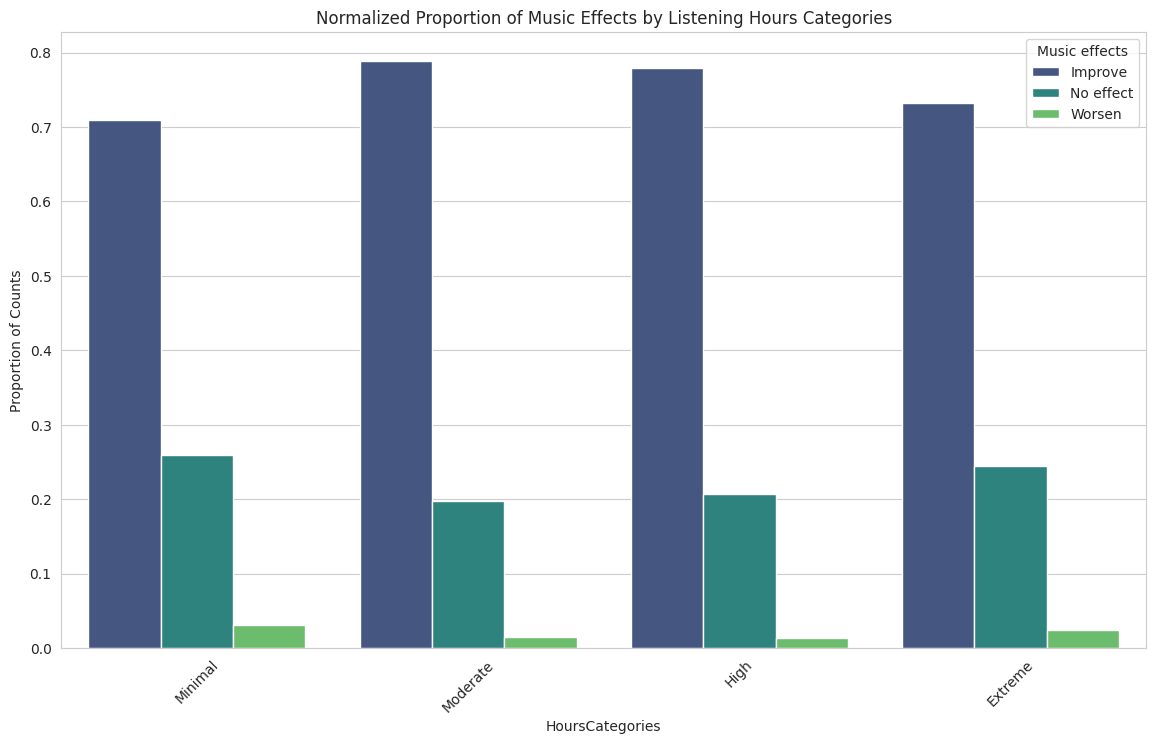

In [45]:
# Calculate the count of each 'Music effects' within each 'AgeCategories'
counts = df.groupby(['HoursCategories', 'Music effects']).size().reset_index(name='counts')
counts
# # Calculate the total counts for each 'AgeCategories'
total_counts = df.groupby('HoursCategories').size().reset_index(name='total_counts')

# # Merge the counts with the total counts
merged = pd.merge(counts, total_counts, on='HoursCategories')

# # Calculate the proportion
merged['proportion'] = merged['counts'] / merged['total_counts']

# # Preview the DataFrame
print(merged.head(50))

# Bar Plot to show proportions
plt.figure(figsize=(14, 8))
sns.barplot(x='HoursCategories', y='proportion', hue='Music effects', data=merged, palette='viridis')
plt.title('Normalized Proportion of Music Effects by Listening Hours Categories')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Counts')
plt.show()


Across all listening categories, a significant majority of listeners report that music improves their condition, especially in moderate listening hours (2-4 hours) where the proportion is the highest at 79%. The proportion of listeners experiencing no effect or worsening effects is relatively low, with the minimal category showing the highest percentage of no effect (26%) and the high category showing the lowest percentage of worsening effects (1.4%). This suggests that music generally has a positive impact on listeners, with the best outcomes occurring at moderate listening levels.

**Bar Plot Analysis: Normalized Proportion of Music Effects by Listening Hours Categories**

The bar plot indicates that music generally has a positive impact across all listening categories, with the highest proportion of improvement seen in moderate listening hours (2-4 hours). As listening hours increase, the proportion of listeners reporting improvements remains high, but there is a slight increase in those experiencing no effect or worsening effects. Minimal listening hours show a higher proportion of no effect compared to other categories. Overall, the data suggests that moderate listening hours yield the most positive effects from music, while extreme listening hours show a small but noticeable increase in negative effects.

### Exploring Lisenting to Music While Working

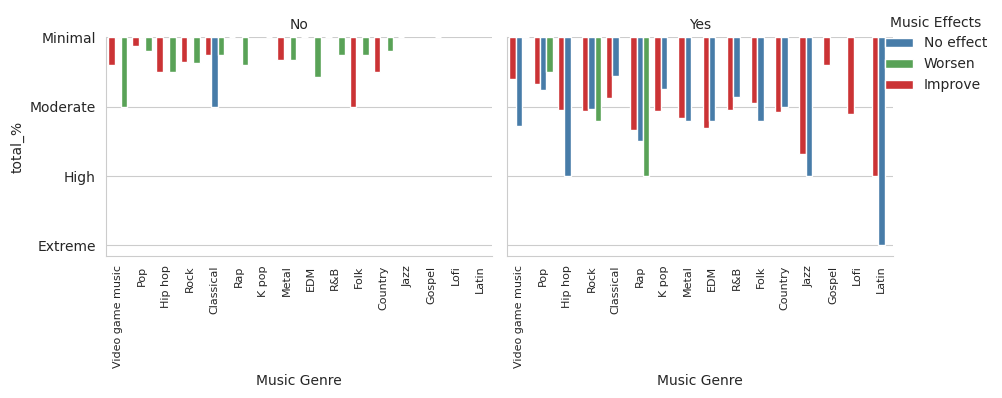

In [46]:
#display multiple bar plots, each representing the relationship between favorite music genre and listening hour categories while working, differentiated by music effects.

g = sns.FacetGrid(df, col='While working', height=4)
g.map_dataframe(sns.barplot, x='Fav genre', y='HoursCategories', hue='Music effects', errorbar=None, palette='Set1')
g.add_legend(title='Music Effects', loc='upper right',bbox_to_anchor=(1.1, 1))  # Legend within the graph
g.set_axis_labels('Music Genre', 'total_%')
g.set_xticklabels(rotation=90, fontsize =8)
g.set_titles(col_template="{col_name}")  # Title for each subplot
plt.tight_layout()
plt.show()


**Bar Plot Analysis: Effect of Music by Genre and Listening Hours Categories (Listening While Working)**

For those who do not listen to music while working, the impact of music genres on their condition is mixed, with genres like Classical and Rock showing more negative effects, especially with minimal listening hours. Those who listen to music while working generally experience more positive effects across most genres, with notable improvements seen even in minimal listening hours. Moderate listening hours tend to yield the best results, while high and extreme listening hours have fewer data points but still show positive effects. Overall, listening to music while working appears to enhance the positive impact of music across various genres.

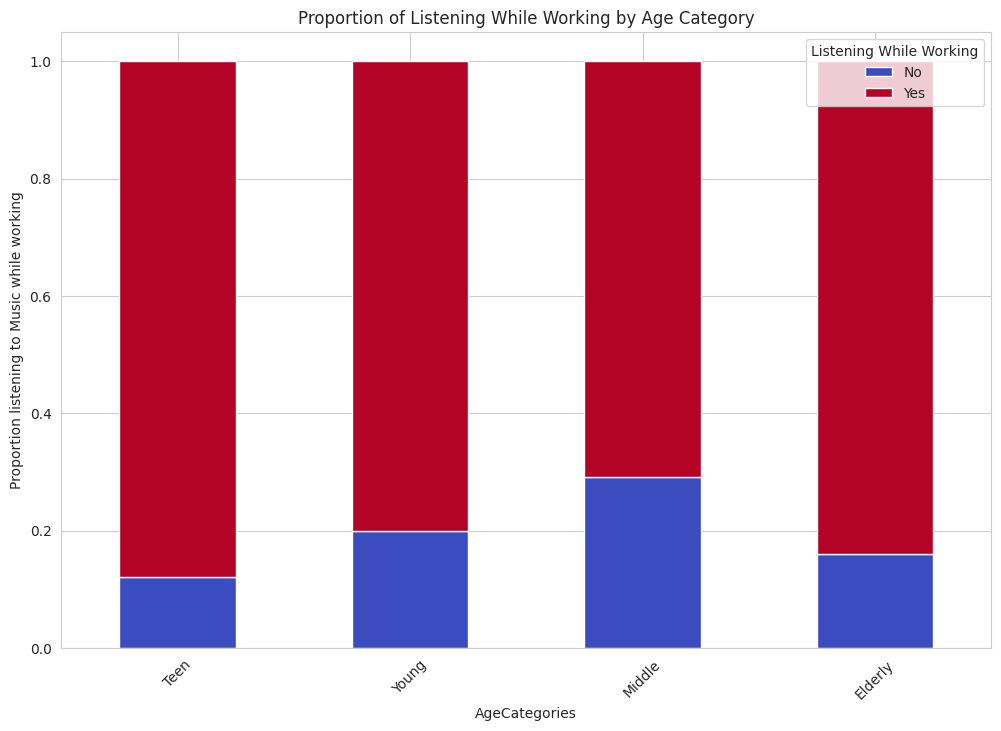

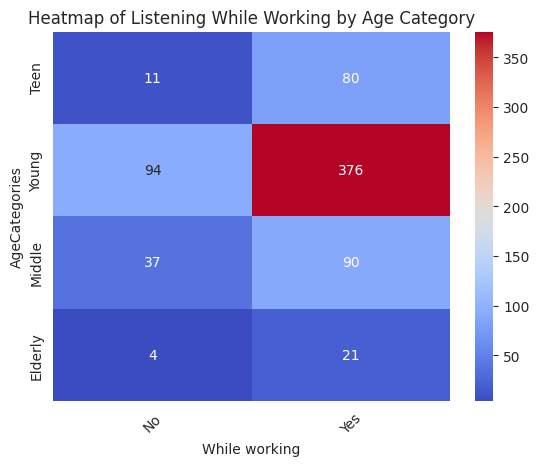

In [47]:
# Stacked Bar Chart: Proportion of Listening While Working within each Age Category
# Creating a crosstab for the proportion
ct = pd.crosstab(index=df['AgeCategories'], columns=df['While working'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Proportion of Listening While Working by Age Category')
plt.xticks(rotation=45)
plt.ylabel('Proportion listening to Music while working')
plt.legend(title='Listening While Working')
plt.show()

# Heatmap: Visualizing the count of responses
# Creating a pivot table for the heatmap
pivot_table = pd.crosstab(index=df['AgeCategories'], columns=df['While working'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Listening While Working by Age Category')
plt.xticks(rotation=45)
plt.show()


**Bar Plot Analysis: Proportion of Listening While Working by Age Category**

Across all age categories, the majority of individuals listen to music while working, with teens, young adults, and the elderly showing similar high proportions(Approx 85%). Middle-aged individuals have a lower proportion (Approx 80%) of those who listen to music while working. The data suggests that listening to music while working is a common habit across all age groups, with a slight variation in the middle-aged category.

**Heatmap Analysis: Listening While Working by Age Category**

The heatmap shows that the majority of individuals in all age categories listen to music while working, with young adults being the largest group (376). Teens, middle-aged, and elderly individuals also show a preference for listening to music while working, but in smaller numbers. The number of individuals who do not listen to music while working is significantly lower across all age categories.

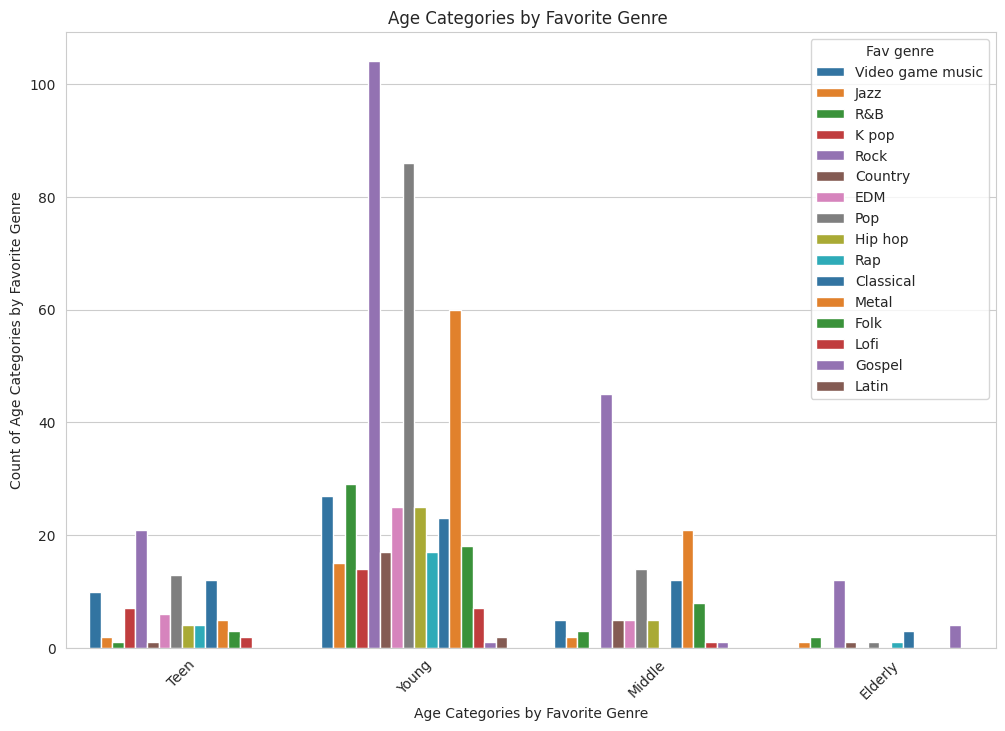

In [48]:
# Count Plot: Number of individuals by AgeCategories and While working
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeCategories', hue='Fav genre', data=df, palette='tab10') #note the hue
plt.title('Age Categories by Favorite Genre ')
plt.xlabel('Age Categories by Favorite Genre')
plt.ylabel('Count of Age Categories by Favorite Genre')
plt.xticks(rotation=45)
plt.show()

**Bar Plot Analysis: Age Categories by Favorite Genre**

The bar plot illustrates the distribution of favorite music genres across different age categories: Teen, Young, Middle, and Elderly.

Young adults show the most diversity in favorite music genres, with EDM, Pop, and Rock being the most popular. Teens also have a varied taste, with K-pop, Hip Hop, and EDM standing out. Middle-aged individuals prefer Rock and EDM, while the elderly have a preference for Jazz, Classical, and Country. Overall, musical preferences vary significantly across age groups, with younger individuals showing more diverse tastes.

###Exploring Data further by Age Categories

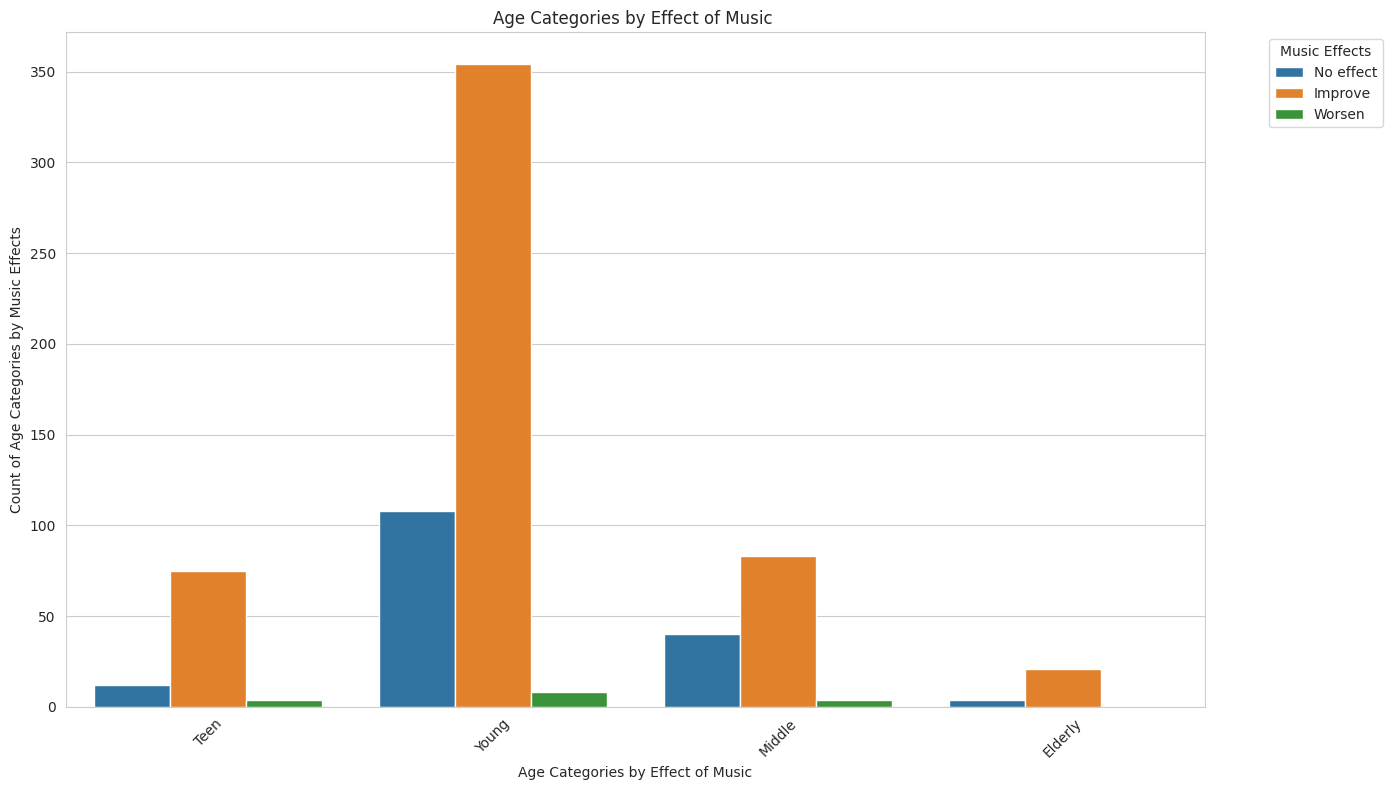

In [49]:
# Count Plot: Number of individuals by AgeCategories and Music effects
plt.figure(figsize=(14, 8))
sns.countplot(x='AgeCategories', hue='Music effects', data=df, palette='tab10')
plt.xticks(rotation=45)
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Age Categories by Effect of Music ')
plt.xlabel('Age Categories by Effect of Music')
plt.ylabel('Count of Age Categories by Music Effects')
plt.tight_layout()
plt.show()


**Bar Plot Analysis: Age Categories by Effect of Music**

The bar plot shows the effect of music (No effect, Improve, Worsen) across different age categories (Teen, Young, Middle, Elderly).

The plot indicates that music generally has a positive impact across all age categories, with young adults experiencing the most significant improvements. Teens and middle-aged individuals also report improvements, but to a lesser extent. The elderly have the smallest number of respondents but still show a trend towards improvement. Across all groups, very few individuals report that music worsens their condition.

Music effects  Improve  No effect  Worsen
AgeCategories                            
Teen                75         12       4
Young              354        108       8
Middle              83         40       4
Elderly             21          4       0


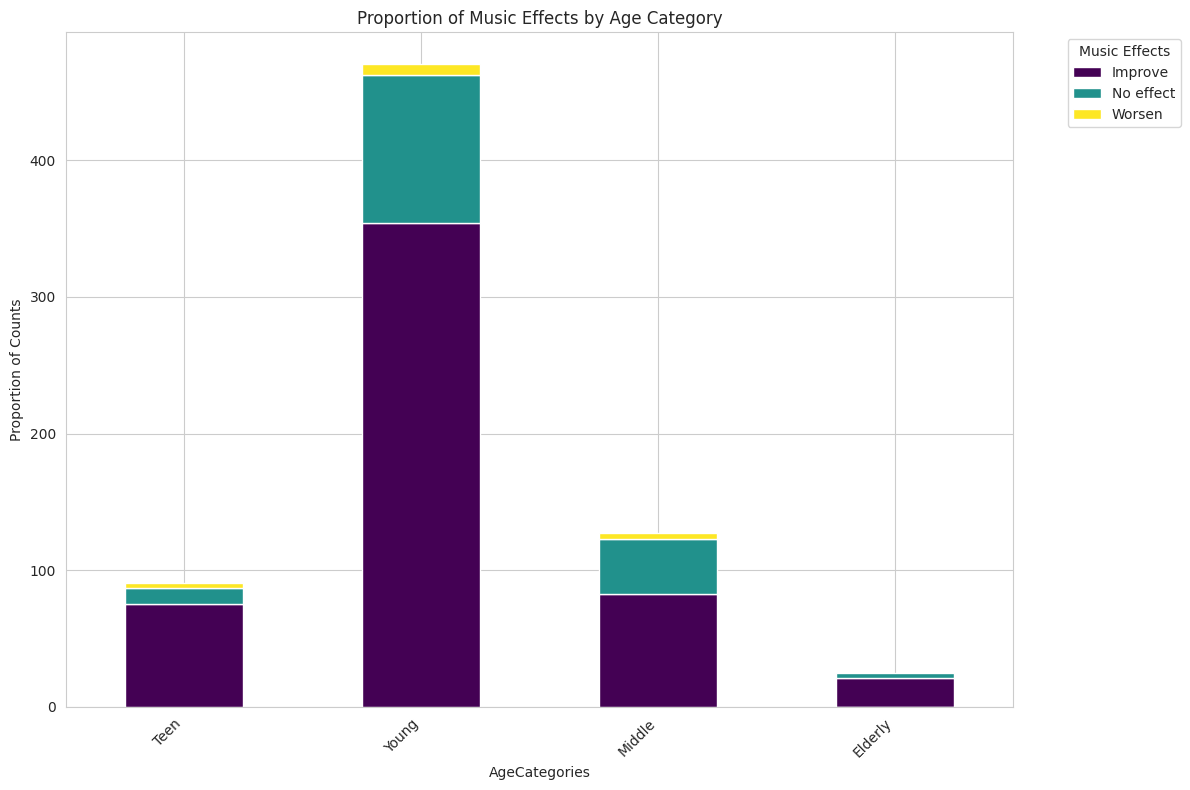

In [50]:
# Creating a crosstab for proportions
ct = pd.crosstab(index=df['AgeCategories'], columns=df['Music effects'])
print(ct)
# Plotting
ct.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis') # add normalize='index' as experiment
plt.title('Proportion of Music Effects by Age Category')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Proportion of Counts')
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Stacked Bar Plot Analysis: Proportion of Music Effects by Age Category**

The stacked bar plot indicates that music generally has a positive effect across all age categories. Young adults report the highest number of improvements, followed by middle-aged individuals, teens, and the elderly. The proportion of individuals experiencing no effect is significant but much lower than those reporting improvements. Very few individuals across all age categories report that music worsens their condition. This suggests that music is widely beneficial, particularly among young adults and middle-aged individuals, with minimal negative impact across all age groups.

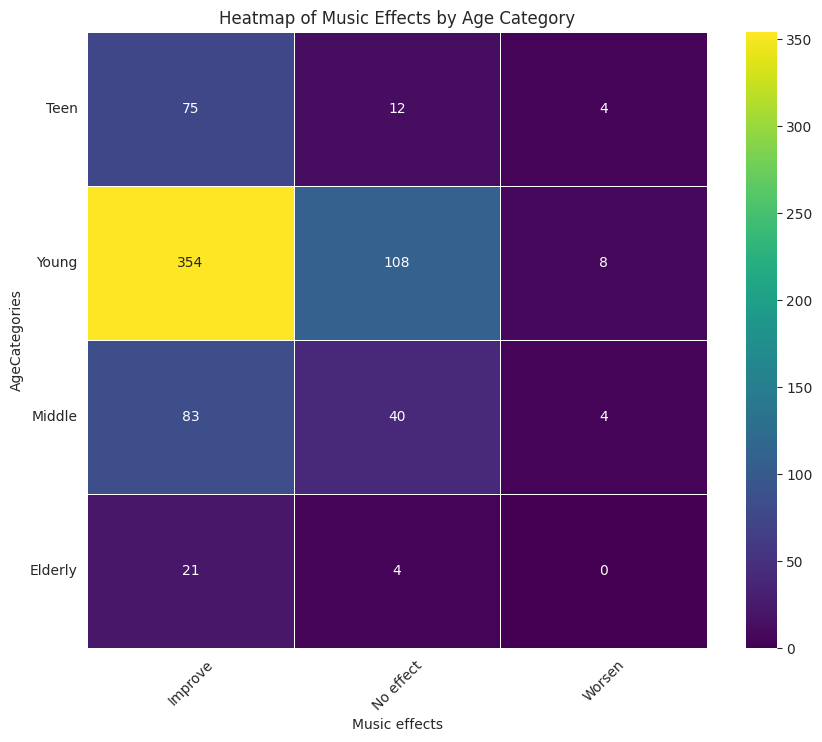

In [51]:
# Creating a pivot table for the heatmap
pivot_table = pd.crosstab(index=df['AgeCategories'], columns=df['Music effects'])

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Heatmap of Music Effects by Age Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**Heatmap Analysis: Music Effects by Age Category**

The heatmap visualizes the count of music effects (Improve, No effect, Worsen) across different age categories (Teen, Young, Middle, Elderly).

The heatmap indicates that music generally has a positive effect across all age categories. Young adults show the highest number of improvements from music, followed by middle-aged individuals, teens, and the elderly. The number of individuals experiencing no effect is significant, particularly among young adults and middle-aged individuals. Very few individuals across all age categories report that music worsens their condition, with no elderly individuals reporting worsening effects. This suggests that music is beneficial for mental health, particularly among young adults and middle-aged individuals, with minimal negative impacts.

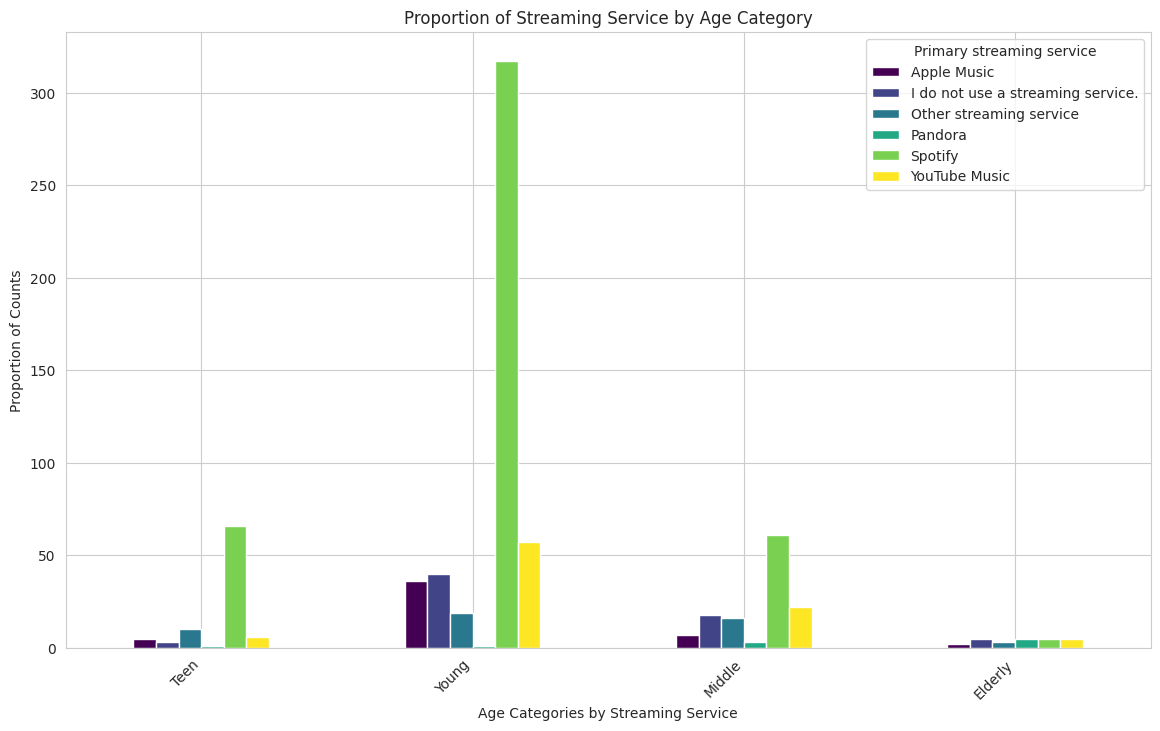

In [52]:
# Creating a crosstab for proportions
ct = pd.crosstab(index=df['AgeCategories'], columns=df['Primary streaming service'])
ct.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='viridis') # add normalize='index' as experiment
plt.title('Proportion of Streaming Service by Age Category')
plt.xlabel('Age Categories by Streaming Service')
plt.ylabel('Proportion of Counts')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Bar Plot Analysis: Proportion of Streaming Service by Age Category**

Spotify is the dominant streaming service across all age categories, especially among young adults, followed by teens and middle-aged individuals. YouTube Music and other streaming services also have a significant presence across all age groups. Apple Music and those not using any streaming service are less prevalent but still notable. Pandora is the least popular streaming service across all age categories. This suggests that Spotify is the preferred choice for music streaming, particularly among young adults.

In [53]:
# Calculate the count of each 'Music effects' within each 'AgeCategories'
counts = df.groupby(['AgeCategories', 'Music effects']).size().reset_index(name='counts')
counts
# # Calculate the total counts for each 'AgeCategories'
total_counts = df.groupby('AgeCategories').size().reset_index(name='total_counts')

# # Merge the counts with the total counts
merged = pd.merge(counts, total_counts, on='AgeCategories')

# # Calculate the proportion
merged['proportion'] = round((merged['counts'] / merged['total_counts']) *100,2)

# # Preview the DataFrame
print(merged.head(50))


   AgeCategories Music effects  counts  total_counts  proportion
0           Teen       Improve      75            91       82.42
1           Teen     No effect      12            91       13.19
2           Teen        Worsen       4            91        4.40
3          Young       Improve     354           470       75.32
4          Young     No effect     108           470       22.98
5          Young        Worsen       8           470        1.70
6         Middle       Improve      83           127       65.35
7         Middle     No effect      40           127       31.50
8         Middle        Worsen       4           127        3.15
9        Elderly       Improve      21            25       84.00
10       Elderly     No effect       4            25       16.00
11       Elderly        Worsen       0            25        0.00


The table highlights that music has a positive impact on the majority of individuals across all age categories, with the elderly and teens experiencing the highest proportions of improvement (84.00% and 82.42%, respectively). Young adults and middle-aged individuals also report significant improvements (75.32% and 65.35%, respectively), though to a slightly lesser extent. The proportion of individuals experiencing no effect is highest among middle-aged individuals (31.50%),

followed by young adults (22.98%). The proportion of individuals reporting that music worsens their condition is relatively low across all age categories, with no elderly individuals reporting worsening effects. This data suggests that music generally has a beneficial impact on mental well-being, particularly for the elderly and teens, while negative effects are minimal across all age groups.

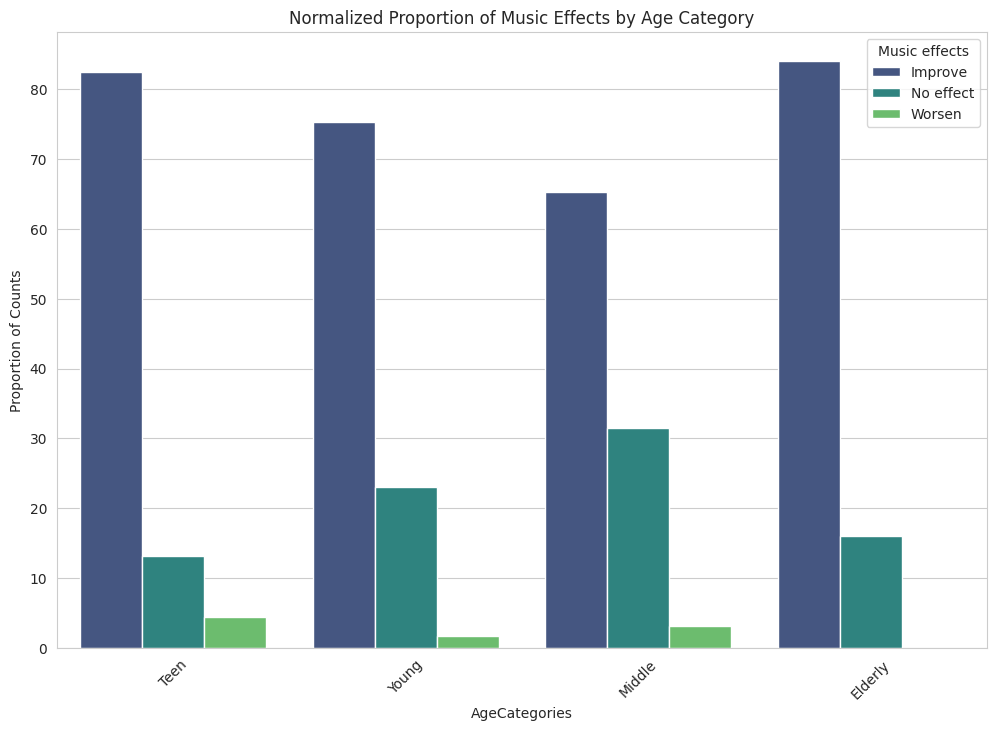

In [54]:
# Bar Plot to show proportions
plt.figure(figsize=(12, 8))
sns.barplot(x='AgeCategories', y='proportion', hue='Music effects', data=merged, palette='viridis')
plt.title('Normalized Proportion of Music Effects by Age Category')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Counts')
plt.show()


The bar plot indicates that music has a predominantly positive effect across all age categories, with the highest proportion of improvement seen in the elderly (84%) and teens (82%). Young adults and middle-aged individuals also experience significant improvements (75% and 65%, respectively). The proportion of individuals experiencing no effect is notable, particularly among young adults (23%) and middle-aged individuals (31%). The proportion of individuals reporting that music worsens their condition is very low across all age categories, with no elderly individuals reporting worsening effects. This suggests that music is generally beneficial for mental well-being, especially for the elderly and teens, with minimal negative impact.

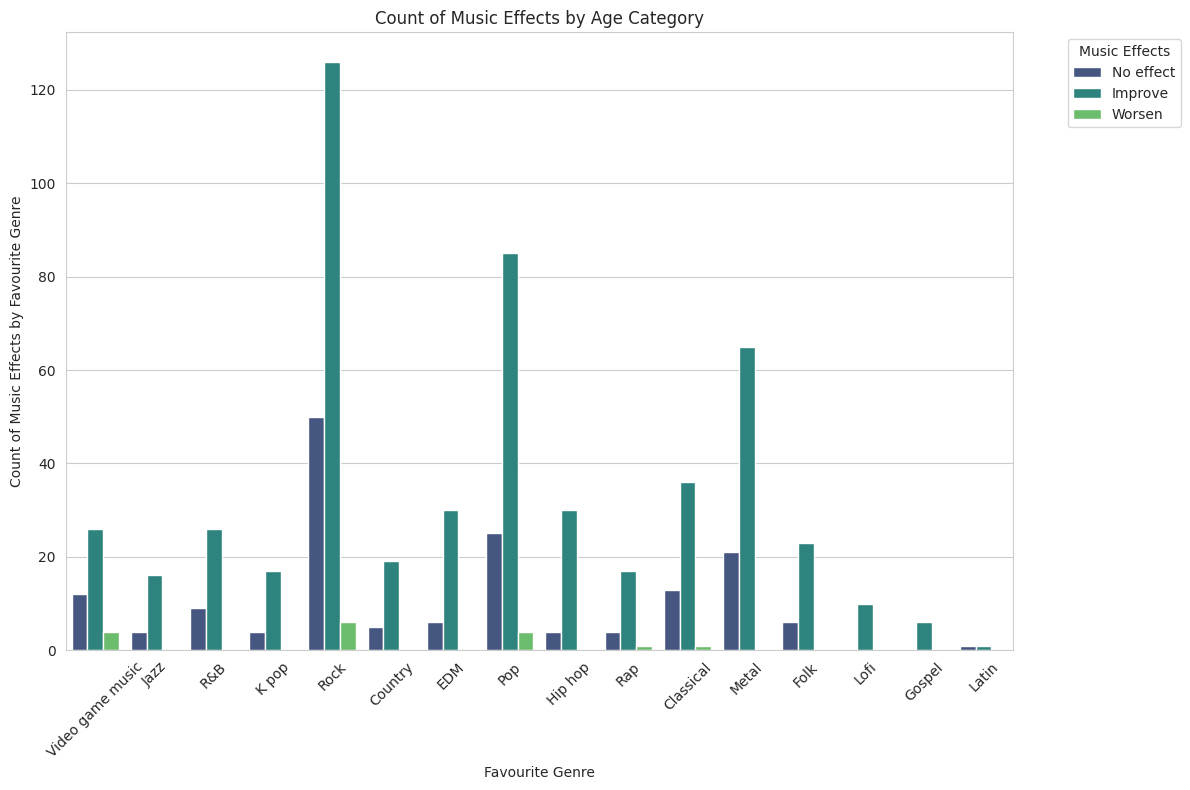

In [55]:
# Set figure size for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for 'Fav genre' with different colors for 'Music effects'
sns.countplot(x='Fav genre', hue='Music effects', data=df, palette='viridis')

# Set the title for the plot
plt.title('Count of Music Effects by Age Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Place a legend outside the plot, in the upper left corner
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')

# Label the x-axis
plt.xlabel('Favourite Genre')

# Label the y-axis
plt.ylabel('Count of Music Effects by Favourite Genre')

# Adjust layout to fit everything neatly
plt.tight_layout()

# Display the plot
plt.show()


**Bar Plot Analysis: Count of Music Effects by Favorite Genre**

The bar plot shows that Rock, Pop, Country, and EDM are the genres most likely to improve individuals' conditions, with Rock being the most impactful. Other genres like Hip Hop and Classical also show significant positive effects but to a lesser extent. The proportion of individuals experiencing no effect is noticeable across all genres, while the proportion reporting worsening effects is very low. This suggests that popular music genres generally have a positive impact on mental well-being, with minimal negative effects.

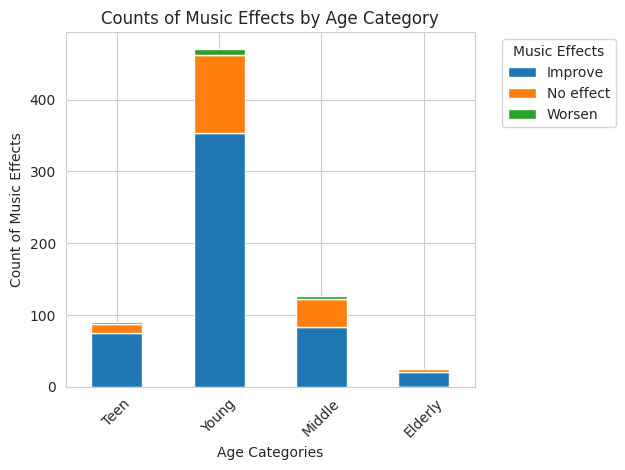

In [56]:
#display multiple bar plots, each representing the relationship between favorite music genre and listening hour categories while working, differentiated by music effects.

df.groupby(['AgeCategories', 'Music effects'])['Music effects'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Counts of Music Effects by Age Category')
plt.xticks(rotation=45)
plt.legend(title='Music Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Age Categories')
plt.ylabel('Count of Music Effects')
plt.tight_layout()
plt.show()


**Bar Plot Analysis: Counts of Music Effects by Age Category**

The bar plot indicates that across all age categories, the majority of individuals report that music improves their condition. Young adults show the highest count of improvements, followed by middle-aged individuals, teens, and the elderly. The proportion of individuals experiencing no effect is notable but significantly lower than those reporting improvements. Very few individuals across all age categories report that music worsens their condition, with no elderly individuals reporting worsening effects. This suggests that music generally has a beneficial impact on mental well-being across all age groups, particularly for young adults.

##5. Further Feature Engineering for Machine Learning

In [57]:
#Importing necessary libraries

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [58]:
#objective is to convert these columns into binary values for machine learning
binary_columns = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
df[binary_columns] = (df[binary_columns] == 'Yes').astype(int)
#True is treated as 1 when converted to an integer, and False is treated as 0.

In [59]:
# To display first few rows of a DataFrame specifically for columns that contain binary data.

df[binary_columns].head()

,While working,Instrumentalist,Composer,Exploratory,Foreign languages
2,0,0,0,0,1
3,1,0,1,1,1
4,1,0,0,1,0
5,1,1,1,1,1
6,1,1,0,1,1


The table displays binary data for different music-related characteristics across multiple individuals. This information can be useful for analyzing the prevalence of these characteristics and understanding correlations between them. For instance, it shows that some individuals listen to music while working and others do not, or that some are instrumentalists and others are not. This binary representation is helpful for statistical analysis and visualization.

In [60]:
# Define the columns to be one-hot encoded
one_hot_columns = ['Primary streaming service', 'Fav genre']

# Initialize an empty DataFrame to store the one-hot encoded columns
dummies = pd.DataFrame()

# Loop through each column to be one-hot encoded
for col in one_hot_columns:
  # Create one-hot encoded DataFrame for the current column, with prefixed column names
  dummy = pd.DataFrame(pd.get_dummies(df[col], prefix=col))

  # Concatenate the new dummy columns to the dummies DataFrame
  dummies = pd.concat([dummies, dummy], axis=1)

  # Drop the original column from the main DataFrame
  df.drop(col, axis=1, inplace=True)

# Concatenate the one-hot encoded columns to the main DataFrame
df = pd.concat([df, dummies], axis=1)


In [61]:
df.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,AgeCategories,HoursCategories,total_issues,total_%,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
2,18,4.0,0,0,0,0,1,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Young,Moderate,26.0,65.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,61,2.5,1,0,1,1,1,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,Elderly,Moderate,22.0,55.0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,18,4.0,1,0,0,1,0,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Young,Moderate,23.0,57.5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,18,5.0,1,1,1,1,1,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Young,High,30.0,75.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6,18,3.0,1,1,0,1,1,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Young,Moderate,18.0,45.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [62]:
# Select columns of boolean data type from the DataFrame   BINARY ENCODING
boolean_column = df.select_dtypes(include=bool).columns

# Loop through each boolean column
for col in boolean_column:
    # Convert the boolean column to integer type (True becomes 1, False becomes 0)
    df[col] = df[col].astype(int)


In [63]:
df.head(30)

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,AgeCategories,HoursCategories,total_issues,total_%,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
2,18,4.0,0,0,0,0,1,132.000000,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Young,Moderate,26.0,65.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,61,2.5,1,0,1,1,1,84.000000,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,Elderly,Moderate,22.0,55.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,18,4.0,1,0,0,1,0,107.000000,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Young,Moderate,23.0,57.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,18,5.0,1,1,1,1,1,86.000000,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Young,High,30.0,75.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,18,3.0,1,1,0,1,1,66.000000,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Young,Moderate,18.0,45.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,21,1.0,1,0,0,1,1,95.000000,Never,Never,Rarely,Never,Never,Very frequently,Rarely,Very frequently,Never,Sometimes,Never,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,Young,Minimal,16.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,19,6.0,1,0,0,0,0,94.000000,Never,Very frequently,Never,Sometimes,Never,Never,Never,Never,Never,Never,Very frequently,Never,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,Young,High,2.0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,18,1.0,1,0,0,1,1,155.000000,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Rarely,Never,Rarely,Rarely,Never,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,Young,Minimal,10.0,25.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,18,3.0,1,1,0,1,0,110.190476,Never,Very frequently,Never,Never,Never,Never,Never,Never,Never,Never,Never,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,Young,Moderate,25.0,62.5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,19,8.0,1,0,0,1,0,125.000000,Rarely,Never,Very frequently,Never,Never,Sometimes,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Rarely,Sometimes,Rarely,Rarely,1.0,0.0,0.0,1.0,Improve,Young,High,2.0,5.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#ORDINAL ENCODING
# Identify columns that start with 'Frequency [' for ordinal encoding
frequency_columns = [col for col in df.columns if col.startswith('Frequency [')]

# Define the order of categories for ordinal encoding
mycategories = [['Never', 'Rarely', 'Sometimes', 'Often', 'Very frequently']]

# Initialize the OrdinalEncoder with specified category order
ordinal_encoder = OrdinalEncoder(categories=mycategories)

# Loop through each frequency column
for col in frequency_columns:
    # Apply ordinal encoding to the column, ensuring the input is a 2D array, and convert the result to integer type
    df[col] = ordinal_encoder.fit_transform(df[[col]]).astype(int)


In [65]:
df.sample(25)

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,AgeCategories,HoursCategories,total_issues,total_%,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music
596,32,8.0,1,0,0,1,0,101.000000,0,0,0,1,0,2,0,0,0,0,2,1,1,2,4,2,7.0,6.0,5.0,8.0,Improve,Middle,High,26.0,65.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
597,22,8.0,1,1,0,1,0,110.000000,2,0,2,1,1,1,2,0,0,0,4,1,1,0,4,4,10.0,7.0,8.0,6.0,Improve,Young,High,31.0,77.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
133,32,1.0,0,0,0,1,0,120.000000,1,0,4,1,1,2,1,0,1,1,0,2,1,1,1,0,3.0,6.0,2.0,0.0,No effect,Middle,Minimal,11.0,27.5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
647,27,3.0,1,0,0,0,0,113.000000,1,1,1,1,0,4,1,1,1,1,1,4,4,2,2,1,7.0,2.0,0.0,1.0,Improve,Young,Moderate,10.0,25.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
656,21,0.5,0,0,0,0,0,108.000000,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,10.0,2.0,1.0,10.0,Worsen,Young,Minimal,23.0,57.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,18,4.0,0,0,0,0,1,132.000000,0,0,4,0,0,1,1,4,0,2,2,1,0,1,1,4,7.0,7.0,10.0,2.0,No effect,Young,Moderate,26.0,65.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
111,16,3.0,0,0,0,0,0,140.000000,1,0,0,0,0,2,1,0,1,0,0,4,2,1,0,0,7.0,5.0,5.0,3.0,Improve,Teen,Moderate,20.0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
233,33,1.0,0,0,0,0,0,120.000000,0,0,0,0,0,2,0,0,1,0,0,2,1,1,4,0,3.0,10.0,4.0,1.0,No effect,Middle,Minimal,18.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
200,25,3.0,1,0,0,1,1,180.000000,1,0,2,2,0,1,0,1,0,2,4,2,1,1,4,2,9.0,6.0,3.0,0.0,Improve,Young,Moderate,18.0,45.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
545,18,2.0,0,0,0,1,1,136.000000,1,0,0,0,0,4,1,0,0,0,1,2,1,4,1,4,6.0,3.0,4.0,2.0,Improve,Young,Minimal,15.0,37.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 6. Clustering Analysis

### KMEANS Clustering

In [66]:
# importing libraries for clustering analysis.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [67]:
#Creating a copy of the dataframe

data=df.copy(deep=True)
data.drop(['AgeCategories', 'Music effects' , 'HoursCategories'], axis=1, inplace =True)


In [68]:
# We'll cluster based on features, so we drop the target variable
X=data.copy(deep=True)
# Feature scaling is important for clustering algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
# You might want to use the elbow method or silhouette analysis to choose the best k
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate the clusters
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add the cluster labels back to the original data

data['Cluster'] = clusters

Silhouette Score: 0.06


The clustering analysis aims to group individuals based on their features using K-Means clustering. The silhouette score of 0.06 indicates that the clusters are not well-defined, suggesting that the chosen number of clusters (k=3) might not be optimal, or the features used may not distinctly separate the groups. Further analysis, such as trying different values of k or using additional features, may help improve the clustering results. A score close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.

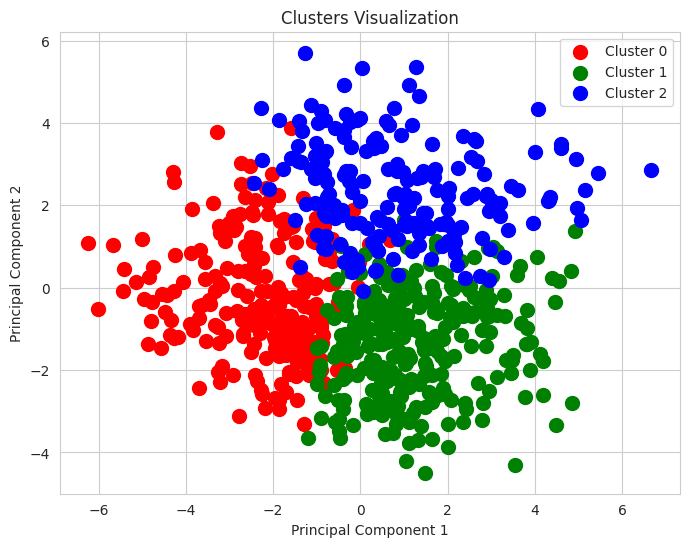

In [69]:
# Now we perform PCA and find top 2 important feature for plotting - This step is experimental in nature.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X_scaled' is your scaled feature set and 'clusters' is the output from KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# This will be used for plotting
cluster_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
cluster_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow']
cluster_labels = list(range(0, len(cluster_df['Cluster'].unique())))

for color, label in zip(colors, cluster_labels):
    subset = cluster_df[cluster_df['Cluster'] == label]
    plt.scatter(subset['principal component 1'], subset['principal component 2'], s=100, color=color, label=f'Cluster {label}')

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


#Issue = We only have a template cluster on Scatter plot, without identifying the names of features on x and y axis reffered to as 'principal component 1', 'principal component 2'

Principal Component Analysis (PCA) and Cluster Visualization

The scatter plot shows the clusters formed by the K-Means algorithm, visualized using the first two principal components derived from PCA. Each color represents a different cluster. The plot helps in understanding how the data points are grouped into clusters based on the features. Although the silhouette score indicated that the clusters were not well-defined, the plot provides a visual representation of the cluster distribution and can help identify patterns or overlaps between clusters.

In [70]:
X = data[['Age', 'total_issues', 'Hours per day']]
# We'll cluster based on features, so we drop the target variable

# Feature scaling is important for clustering algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
# You might want to use the elbow method or silhouette analysis to choose the best k
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate the clusters
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add the cluster labels back to the original data
data['Cluster'] = clusters

Silhouette Score: 0.32


**K-Means Clustering with Improved Silhouette Score**

The clustering analysis using Age, total_issues, and Hours per day features shows a moderate silhouette score of 0.32, indicating an improvement over the previous score of 0.06. This suggests that the clusters are better defined but still not optimal. The chosen features seem to provide a clearer separation of the data points into distinct clusters, but further optimization may be needed to achieve higher clustering quality.

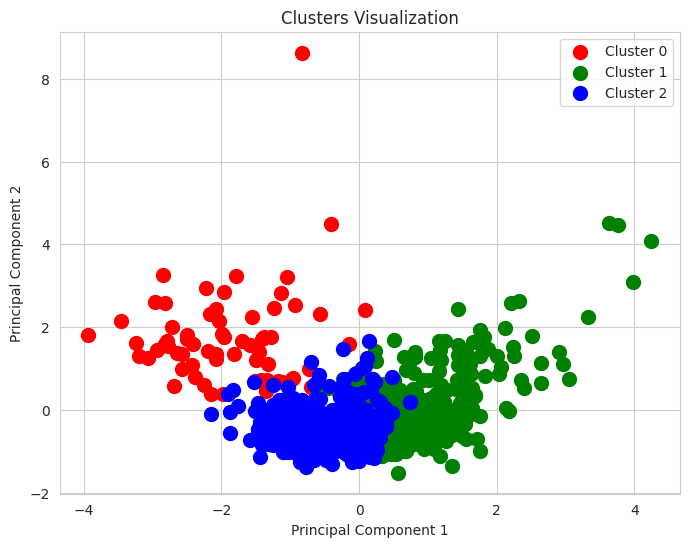

In [71]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X_scaled' is your scaled feature set and 'clusters' is the output from KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# This will be used for plotting
cluster_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
cluster_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow']
cluster_labels = list(range(0, len(cluster_df['Cluster'].unique())))

for color, label in zip(colors, cluster_labels):
    subset = cluster_df[cluster_df['Cluster'] == label]
    plt.scatter(subset['principal component 1'], subset['principal component 2'], s=100, color=color, label=f'Cluster {label}')

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#Issue = We only have a template cluster on Scatter plot, without identifying the names of features on x and y axis reffered to as 'principal component 1', 'principal component 2'
#This will be more clear as we learn more in Machine Learning modules

The scatter plot provides a visual representation of the clusters formed by the K-Means algorithm using the first two principal components derived from PCA. The plot shows that the data points are grouped into three distinct clusters, with moderate separation. Cluster 0 is primarily spread out on the left, Cluster 1 forms a dense group in the center, and Cluster 2 is distributed on the right. This visualization helps in understanding the distribution and overlap of clusters in a reduced dimensional space, confirming that the clustering algorithm has identified distinct groups within the data.

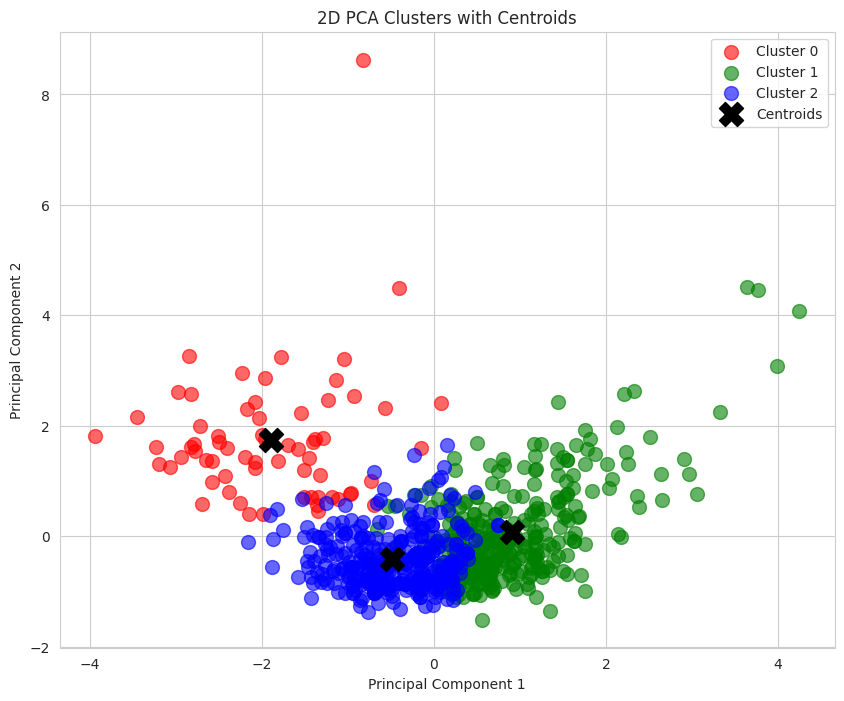

In [72]:
# Scatter plot with cluster centroids
plt.figure(figsize=(10, 8))

# Scatter plot for the clusters
for color, label in zip(colors, cluster_labels):
    subset = cluster_df[cluster_df['Cluster'] == label]
    plt.scatter(subset['principal component 1'], subset['principal component 2'], s=100, color=color, label=f'Cluster {label}', alpha=0.6)

# Scatter plot for centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='black', label='Centroids', marker='X')

plt.title('2D PCA Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

**2D PCA Clusters with Centroids**

The scatter plot shows the distribution of data points into three clusters identified by the K-Means algorithm, visualized in a 2D space defined by the first two principal components from PCA. The centroids of each cluster are marked with black crosses, indicating the center of each cluster. Cluster 0 is predominantly on the left, Cluster 1 is in the center, and Cluster 2 is on the right. This visualization helps in understanding the spatial distribution and central tendencies of the clusters, confirming that the algorithm has grouped the data points into distinct clusters with moderate separation.

## 7. Machine Learning Analysis

### Random Forest Classifier

In [73]:
#importing libraries for building and evaluating machine learning models.

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [74]:
data=df.copy(deep=True)
data.drop(['AgeCategories', 'HoursCategories'], axis=1, inplace =True)

In [75]:
# Step1: Drop Target Variable
y = data['Music effects']  # Target variable
X = data.drop(['Music effects'], axis=1)  # Features

In [76]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [78]:
# Step 4: Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 75.70%
              precision    recall  f1-score   support

     Improve       0.76      1.00      0.86       161
   No effect       0.50      0.02      0.04        49
      Worsen       0.00      0.00      0.00         4

    accuracy                           0.76       214
   macro avg       0.42      0.34      0.30       214
weighted avg       0.69      0.76      0.66       214



The code builds a Random Forest Classifier to predict the Music effects based on other features in the dataset. The model is trained on 70% of the data and evaluated on the remaining 30%. The performance of the model is assessed using accuracy and a detailed classification report, which provides insights into how well the model performs in classifying the different effects of music.


The Random Forest Classifier achieved an accuracy of 75.70%. It predicts the "Improve" class well, with a precision of 0.76, recall of 1.00, and an F1-score of 0.86. However, it struggles with the "No effect" and "Worsen" classes, showing very low precision, recall, and F1-scores for both. The model performs best on the majority class ("Improve"), but its overall performance on the minority classes ("No effect" and "Worsen") is poor, indicating a need for further tuning or more balanced data.

### Regression

In [79]:
#to display list of column names present in the DataFrame
df.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'AgeCategories', 'HoursCategories', 'total_issues', 'total_%',
       'Primary streaming service_Apple Music',
       'Primary streaming service_I do not use a streaming service.',
       'Primary streaming service_Other streaming service',
       'Primary streaming service_Pandora',
       'Primary streaming service_Spotify',
       'Primary streaming service_YouTube Music', 'Fav genre_Classical',
       'Fav gen

In [80]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data=df.copy(deep=True)

# Selecting the features for regression
y = data[['total_%']]
X = data[['Hours per day', 'Age', 'BPM']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Displaying the regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Mean Squared Error: 419.71476649217806
R-squared: 0.023376861269909344
Intercept: [40.97802741]
Coefficients: [[ 0.86771637 -0.27339071  0.04218867]]


Interpretation: An MSE of 419.71 indicates that, on average, the squared differences between the actual and predicted values are 419.71. Lower MSE values indicate a better fit of the model to the data, while higher values suggest a poorer fit. In this case, 419.71 is relatively high, suggesting the model may not be fitting the data well.

Interpretation: An R-squared value of 0.023 suggests that only about 2.34% of the variance in the total percentage (y) is explained by the model with the given independent variables (Hours per day, Age, BPM). This is very low, indicating that the model does not explain much of the variability in the data. The model has a poor fit and other variables not included in the model might have a stronger influence on the dependent variable.

The given results indicate that your linear regression model explains very little of the variability in the dependent variable (R-squared = 0.023). The model's predictions are not very accurate, as indicated by the high MSE (419.71). The coefficients suggest that 'Hours per day' has the largest positive effect on the total percentage, while 'Age' has a negative effect, and 'BPM' has a small positive effect. However, given the low R-squared, these relationships are weak, and the model might not be capturing the true underlying patterns in the data.


### Naive Bayes

In [81]:
#Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

#Creating a copy and defining the features and target variable

data=df.copy(deep=True)
features = ['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD',
       'total_issues', 'total_%',
       'Primary streaming service_Apple Music',
       'Primary streaming service_I do not use a streaming service.',
       'Primary streaming service_Other streaming service',
       'Primary streaming service_Pandora',
       'Primary streaming service_Spotify',
       'Primary streaming service_YouTube Music', 'Fav genre_Classical',
       'Fav genre_Country', 'Fav genre_EDM', 'Fav genre_Folk',
       'Fav genre_Gospel', 'Fav genre_Hip hop', 'Fav genre_Jazz',
       'Fav genre_K pop', 'Fav genre_Latin', 'Fav genre_Lofi',
       'Fav genre_Metal', 'Fav genre_Pop', 'Fav genre_R&B', 'Fav genre_Rap',
       'Fav genre_Rock', 'Fav genre_Video game music']

target = 'Music effects'

# Splitting the data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.21678321678321677
Classification Report:
              precision    recall  f1-score   support

     Improve       0.85      0.10      0.19       105
   No effect       0.30      0.49      0.37        35
      Worsen       0.04      1.00      0.08         3

    accuracy                           0.22       143
   macro avg       0.40      0.53      0.21       143
weighted avg       0.70      0.22      0.23       143



In [82]:
#to count the occurrences of each value in the column "Music effects" in the DataFrame
data.value_counts('Music effects')

Music effects
Improve      533
No effect    164
Worsen        16
Name: count, dtype: int64

The accuracy is low because there is hardly any data for "Worsen" and very few records for "No effect", but since there is some data for "Improve" we are seeing 85% accuracy. If this was a real world excersize the recommendation would be to collect more data.